In [1]:
import pandas as pd
import numpy as np
import importlib
from datetime import datetime
import matplotlib.pyplot as plt

import option_strategies_const_leverage
import volpy_func_lib as vp
import load_clean_lib
import table_lib
import vol_strat_lib as vs
import option_strategies_const_leverage as const_vs
import option_returns as orpy

In [2]:
importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)

<module 'vol_strat_lib' from 'D:\\Professionelt\\Code\\volpy\\vol_strat_lib.py'>

# Load Data

In [3]:
om_folder = "SPX_full" #SPX_full, i2s1_full_v2
sum_df, od_raw = vs.import_sum_raw(om_folder = om_folder)

In [4]:
price_type = "mid"
IV_type = "om"
OTMs = [0.05, 0.15]

od_hl = vs.create_od_hl(od_raw = od_raw, sum_df = sum_df, price_type = price_type, IV_type = IV_type)
sum_df = vs.add_F_to_sum_df(od_hl = od_hl, sum_df = sum_df)
sum_df = vs.add_ATM_options_to_sum_df(sum_df = sum_df, od_hl = od_hl, od_raw = od_raw, OTMs = OTMs)

# Add strategy cashflows

In [62]:
importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)
importlib.reload(const_vs)
importlib.reload(orpy)

curr_OTMs = OTMs
HL30_list = ["30"] # ["low", "high", "30"], ["30"]

df_orpy = sum_df.copy()
df_orpy = orpy.D_PC_option_prices(df_orpy, curr_OTMs)

Strategies = [orpy.add_put_and_call_sgy, orpy.add_straddle_strangle_sgy, orpy.add_butterfly_spread_sgy, orpy.add_condor_strangle_sgy, orpy.add_stock_sgy, orpy.add_stacked_straddle_sgy, orpy.add_full_stacked_straddle_sgy, orpy.add_full_stacked_strangle_sgy]
for add_sgy in Strategies:
    df_orpy = add_sgy(df_orpy, curr_OTMs, HL30_list)

# Strategies = [df_orpy.add_put_and_call_sgy, df_orpy.add_straddle_strangle_sgy, df_orpy.add_butterfly_spread_sgy, df_orpy.add_self_financed_stock_sgy]
# for add_sgy in Strategies:
#     df_orpy = add_sgy(df_orpy, OTMs)

D:\Professionelt\Code\volpy\option_returns.py:139: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
D:\Professionelt\Code\volpy\option_returns.py:140: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
D:\Professionelt\Code\volpy\option_returns.py:149: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
D:\Professionelt

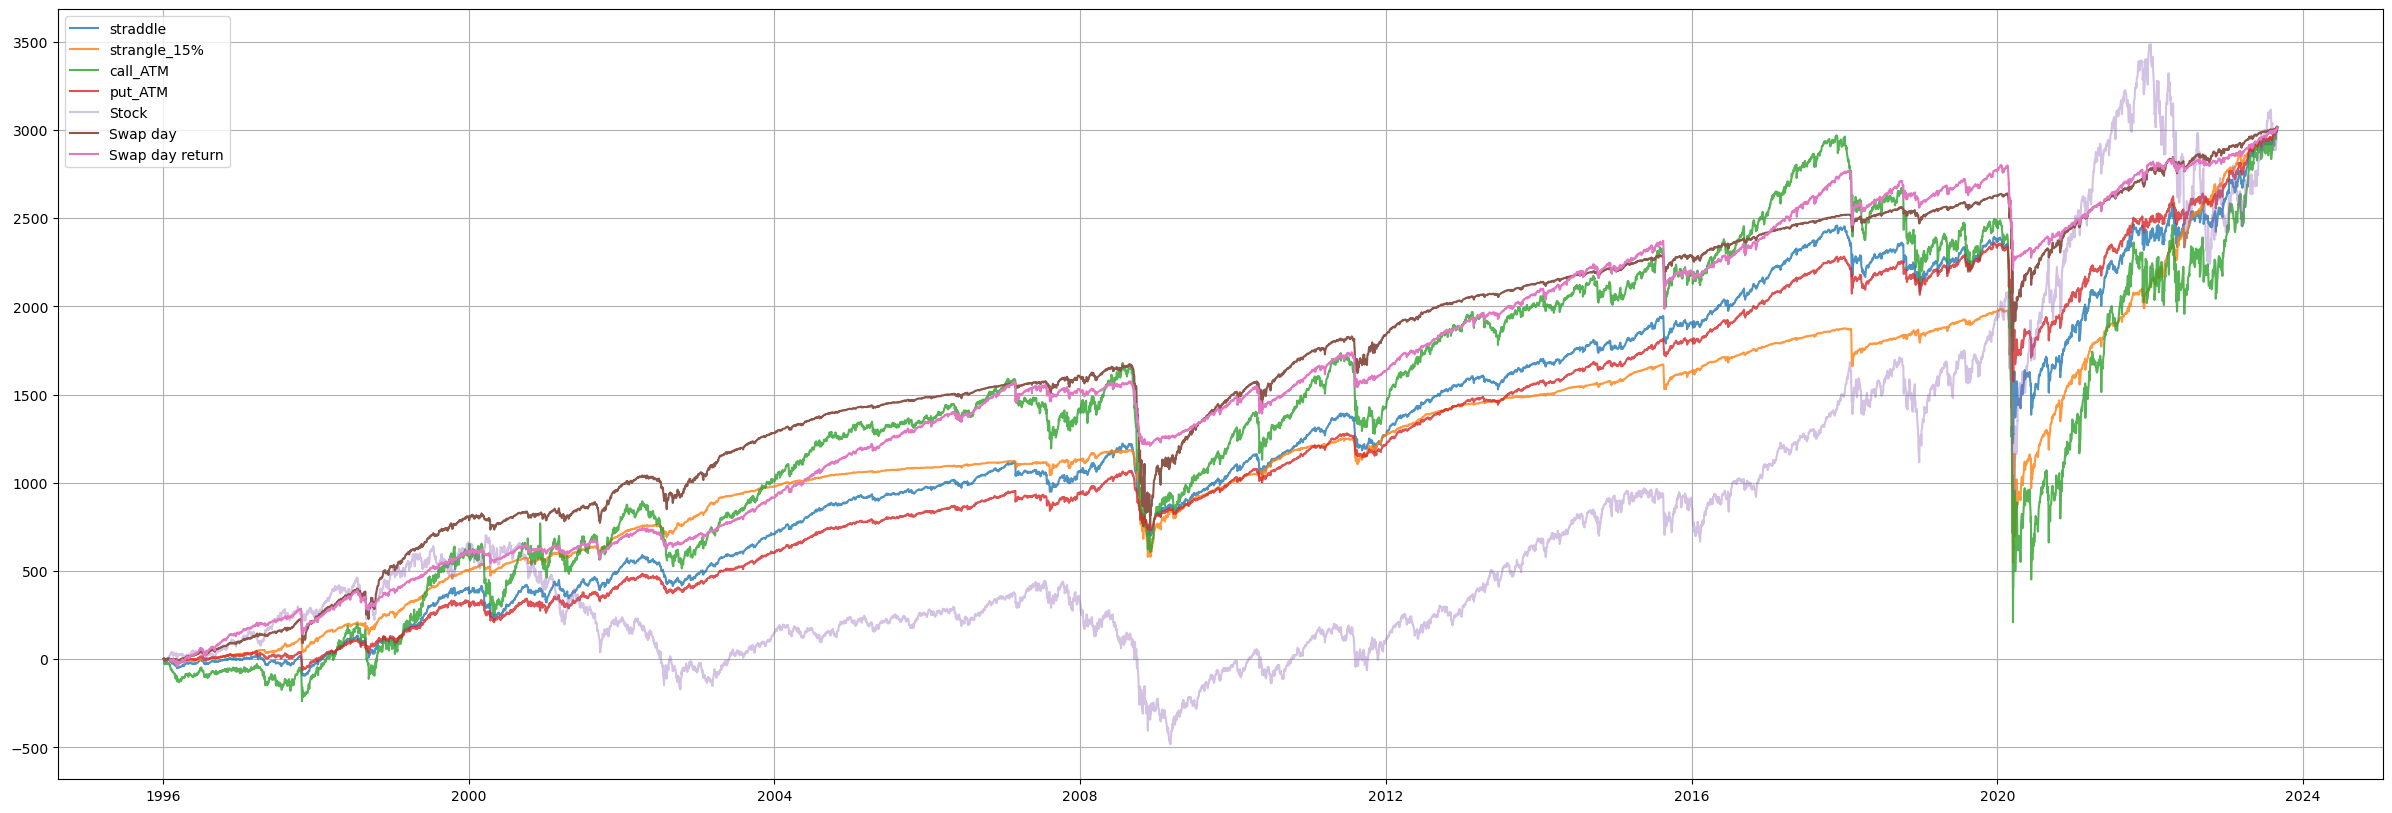

In [74]:
df = df_orpy

sgy_common = "CF_D_30_"
sgy_list = ["straddle", "strangle_15%", "call_ATM", "put_ATM"]

# df["SW_day_const"] = df["SW_day"] / df["SW_buy"]
df["r_SW_day"] = df["SW_day"] / df["SW_buy"].shift(1).rolling(window=21).mean()

plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["CF_stock"]).iloc[-1]
    
for sgy in sgy_list:
    sgy_str = sgy_common + sgy
    last_option_val = np.cumsum(df[f"{sgy_str}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"{sgy_str}"]), label=rf"{sgy}", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["CF_stock"]),
    label="Stock", alpha=0.4)


x_SW_dly = df["SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day")

x_SW_dly = df["r_SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day return")


plt.grid()
plt.legend()
plt.show()

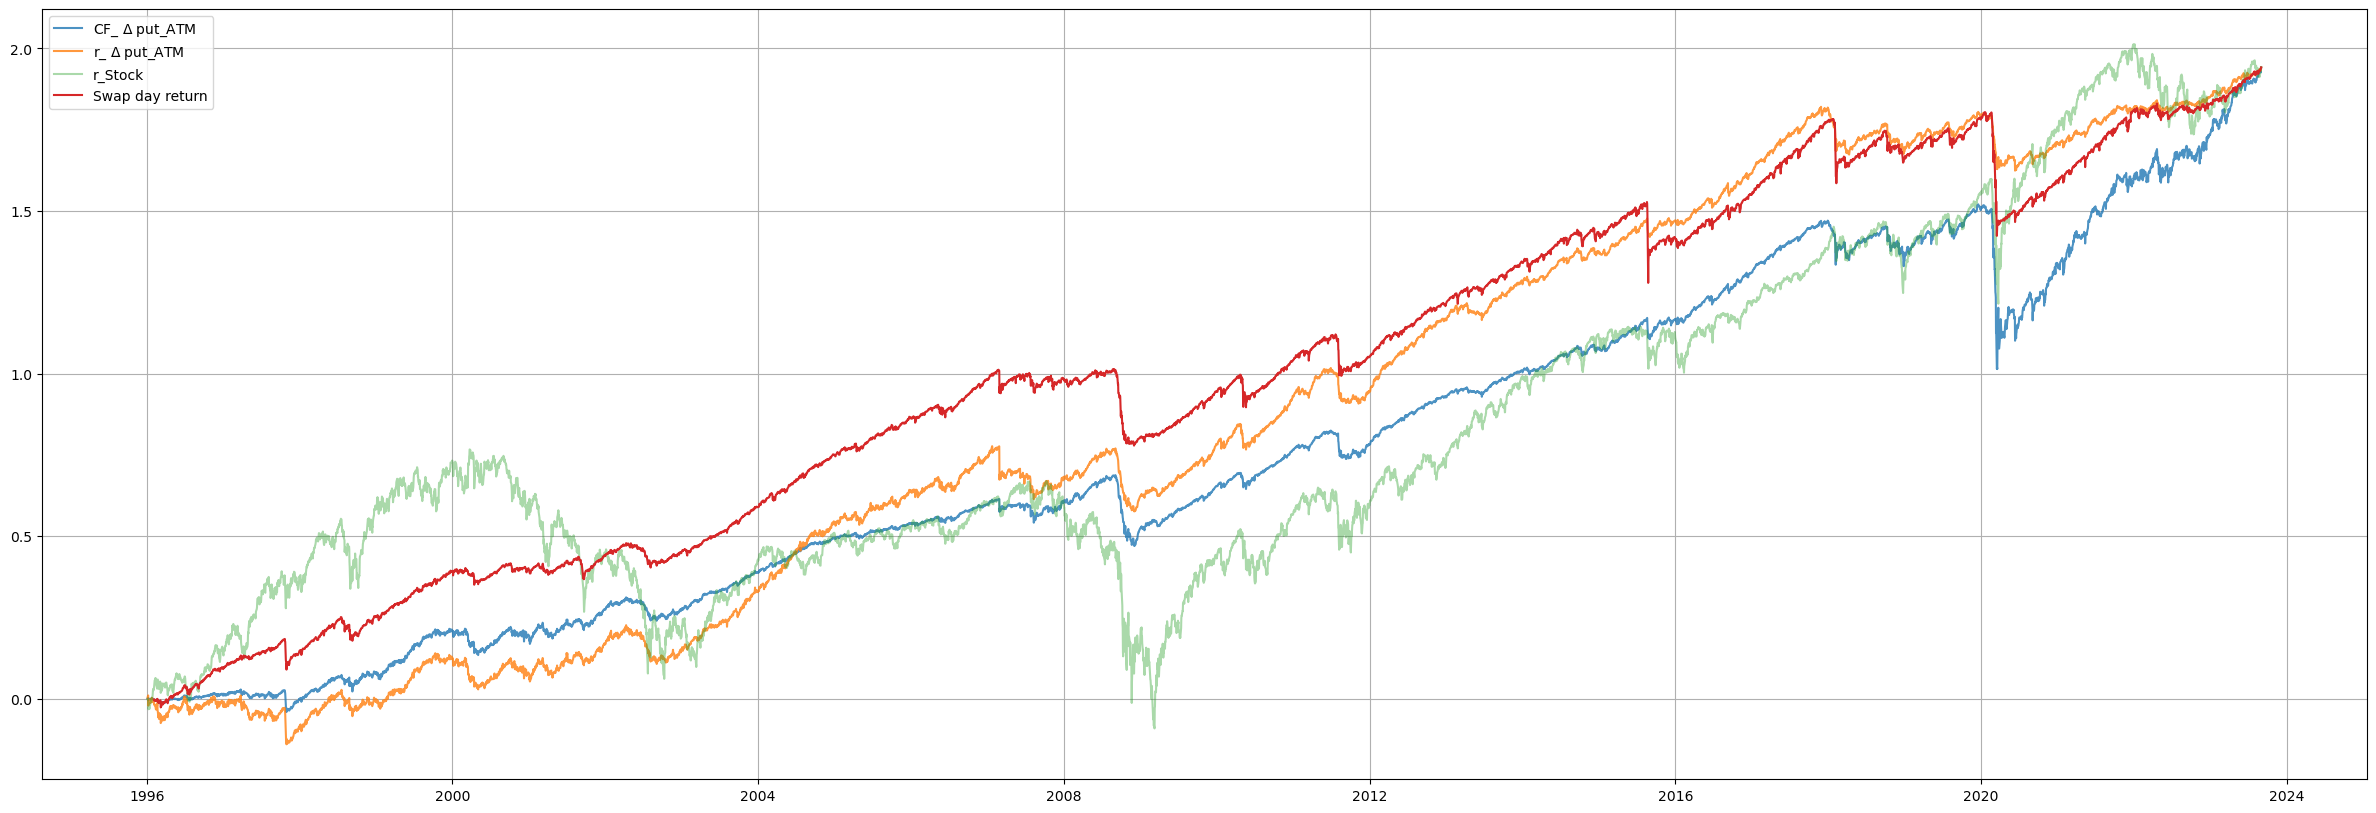

In [103]:
df = df_orpy

CF_r_list = ["CF_", "r_"]
sgy_common = "D_30_"
sgy_list = ["put_ATM"]

# df["SW_day_const"] = df["SW_day"] / df["SW_buy"]
df["r_SW_day"] = df["SW_day"] / df["SW_buy"].shift(1).rolling(window=21).mean()

plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["r_stock"]).iloc[-1]
    
for CF_r in CF_r_list:
    for sgy in sgy_list:
        sgy_str = CF_r + sgy_common + sgy
        last_option_val = np.cumsum(df[f"{sgy_str}"]).iloc[-1]
        scalar = last_stock_val/last_option_val
        plt.plot(df["date"], scalar * np.cumsum(df[f"{sgy_str}"]), label=fr"{CF_r} $\Delta$ {sgy}", alpha=0.8)
        
plt.plot(df["date"], np.cumsum(df["r_stock"]), label="r_Stock", alpha=0.4)


# x_SW_dly = df["SW_day"]
# last_val = np.cumsum(x_SW_dly).iloc[-1]
# scalar = last_stock_val/last_val
# plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day")

x_SW_dly = df["r_SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day return")


plt.grid()
plt.legend()
plt.show()

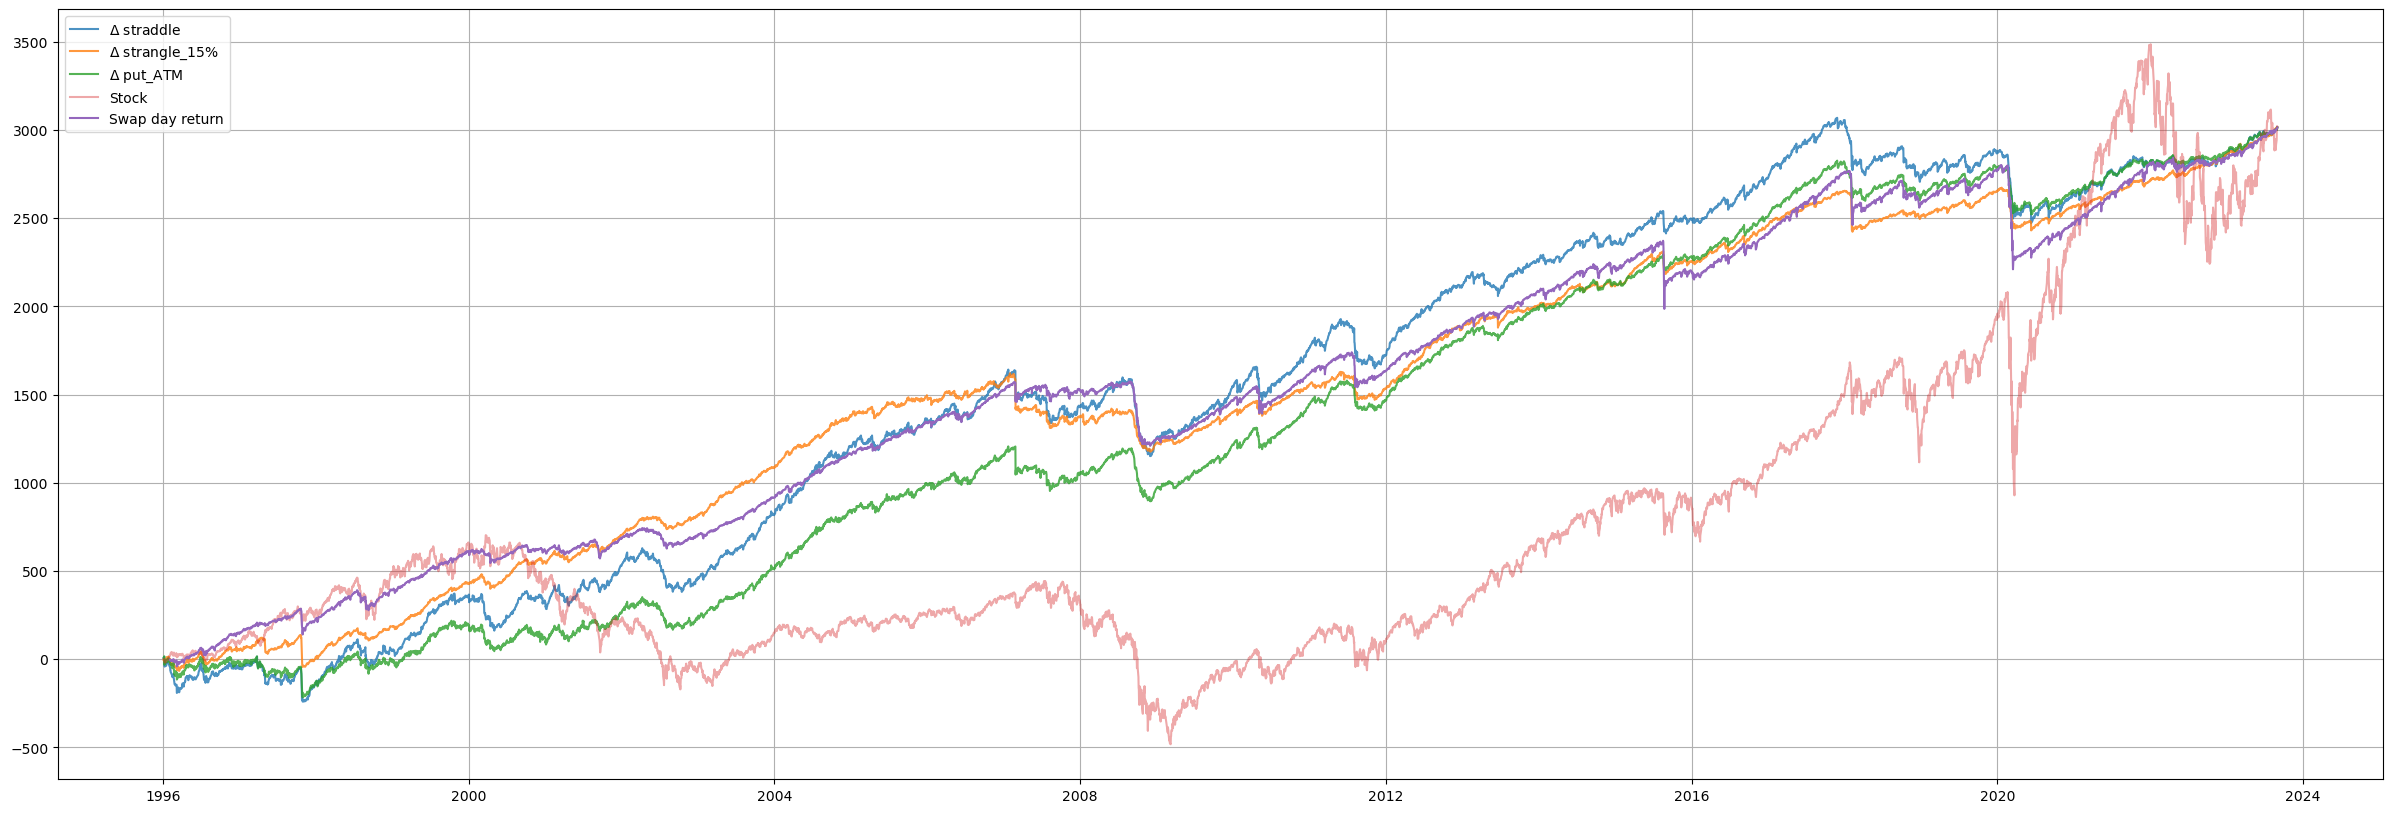

In [85]:
df = df_orpy

sgy_common = "r_D_30_"
sgy_list = ["straddle", "strangle_15%", "put_ATM"]

# df["SW_day_const"] = df["SW_day"] / df["SW_buy"]
df["r_SW_day"] = df["SW_day"] / df["SW_buy"].shift(1).rolling(window=21).mean()

plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["CF_stock"]).iloc[-1]
    
for sgy in sgy_list:
    sgy_str = sgy_common + sgy
    last_option_val = np.cumsum(df[f"{sgy_str}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"{sgy_str}"]), label=fr"$\Delta$ {sgy}", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["CF_stock"]),
    label="Stock", alpha=0.4)


# x_SW_dly = df["SW_day"]
# last_val = np.cumsum(x_SW_dly).iloc[-1]
# scalar = last_stock_val/last_val
# plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day")

x_SW_dly = df["r_SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day return")


plt.grid()
plt.legend()
plt.show()

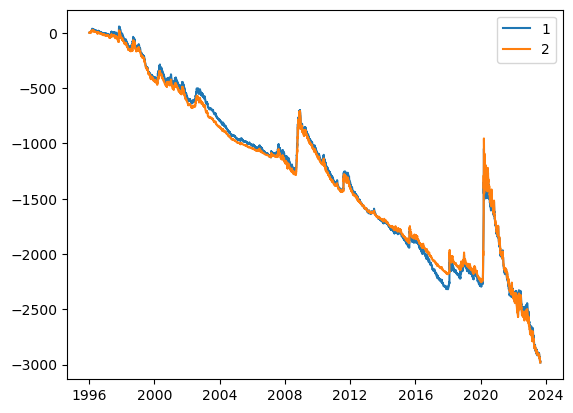

In [60]:
y1 = np.cumsum(df_orpy["CF_D_30_full_stacked_straddle"])
# y2 = np.cumsum(df_orpy["CF_D_30_strangle_5%"])
y2 = np.cumsum(df_orpy["CF_D_30_full_stacked_strangle"])

k = y1.iloc[-1] / y2.iloc[-1]

plt.plot(df_old["date"], y1, label = "1")
plt.plot(df_old["date"], k * y2, label = "2")
plt.legend()

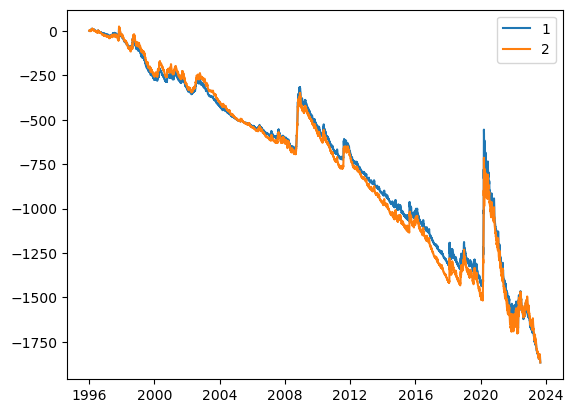

In [35]:
y1 = np.cumsum(df_orpy["CF_30_stacked_straddle_5%_15%"])
y2 = np.cumsum(df_orpy["CF_30_strangle_5%"])
k = y1.iloc[-1] / y2.iloc[-1]

plt.plot(df_old["date"], y1, label = "1")
plt.plot(df_old["date"], k * y2, label = "2")
plt.legend()

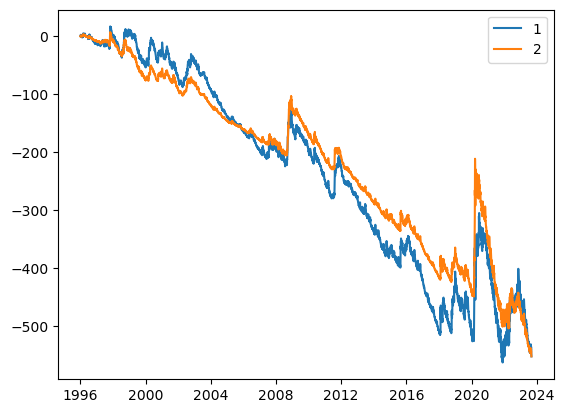

In [29]:
y1 = np.cumsum(df_orpy["CF_30_condor_strangle_5%_15%"])
y2 = np.cumsum(df_orpy["CF_30_strangle_5%"])
k = y1.iloc[-1] / y2.iloc[-1]

plt.plot(df_old["date"], y1, label = "1")
plt.plot(df_old["date"], k * y2, label = "2")
plt.legend()

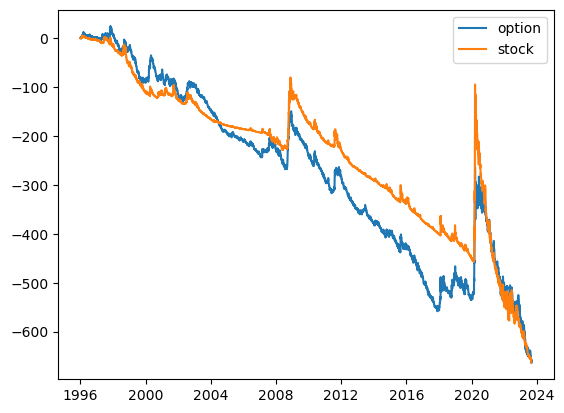

In [269]:
y_call = np.cumsum(df_orpy["CF_30_straddle"])
y_stock = np.cumsum(df_old["30_strangle"])
k = y_stock.iloc[-1] / y_call.iloc[-1]

plt.plot(df_old["date"], k * y_call, label = "option")
plt.plot(df_old["date"], y_stock, label = "stock")
plt.legend()

### Limit to ticker subset (SPX) ect. if wanted

In [46]:
# df = df[sum_df["ticker"] == "SPX"].reset_index(drop=True)

# Test new const CF's

In [46]:
df = df_orpy

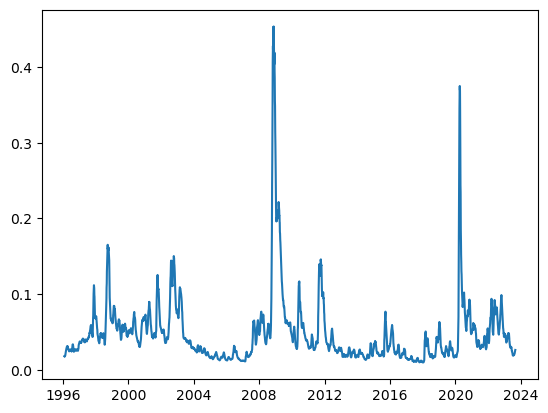

In [47]:
plt.plot(df["date"], df["SW_buy"].shift(1).rolling(window=21).mean())

In [70]:
error = (
        (df_old["30_call_ATM"] - df_orpy["CF_30_call_ATM"]) + 
        (df_old["30_put_ATM"] - df_orpy["CF_30_put_ATM"]) + 
        (df_old["30_call_OTM"] - df_orpy["CF_30_call_OTM_15%"]) + 
        (df_old["30_put_OTM"] - df_orpy["CF_30_put_OTM_15%"]) + 
        (df_old["30_call_D_ATM"] - df_orpy["CF_D_30_call_ATM"]) + 
        (df_old["30_put_D_ATM"] - df_orpy["CF_D_30_put_ATM"]) +
        (df_old["30_call_D_OTM"] - df_orpy["CF_D_30_call_OTM_15%"]) + 
        (df_old["30_put_D_OTM"] - df_orpy["CF_D_30_put_OTM_15%"]) +
        (df_old["30_straddle"] - df_orpy["CF_30_straddle"]) +
        (df_old["30_D_straddle"] - df_orpy["CF_D_30_straddle"]) +
        (df_old["30_strangle"] - df_orpy["CF_30_strangle_15%"]) +
        (df_old["30_D_strangle"] - df_orpy["CF_D_30_strangle_15%"]) +
        (df_old["30_butterfly_spread"] - df_orpy["CF_30_butterfly_spread_15%"]) +
        (df_old["30_D_butterfly_spread"] - df_orpy["CF_D_30_butterfly_spread_15%"]) +
        (df_old["ticker_change_free"] - df_orpy["CF_stock"]) 
         )

# plt.plot(df_orpy["date"], error, label = "error")
# plt.show()
# plt.plot(df_orpy["date"], np.cumsum(error), label = "error")
# plt.show()

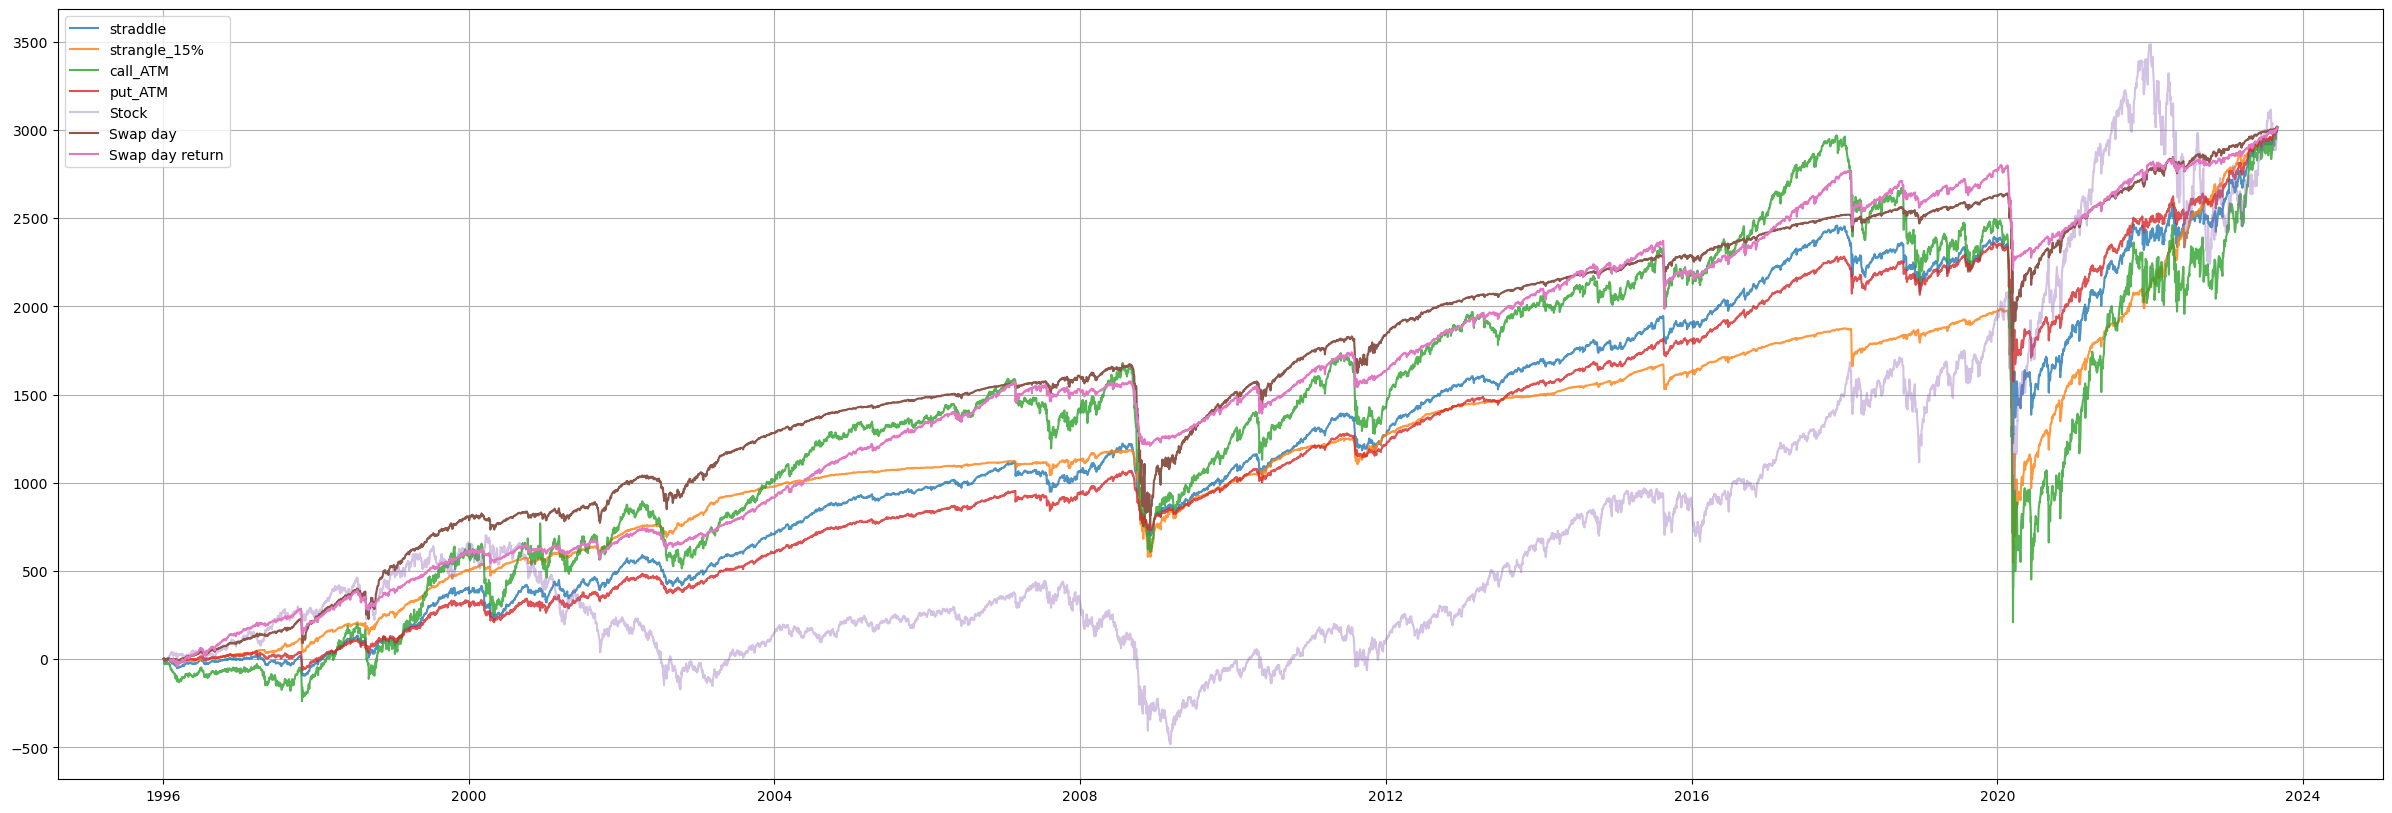

In [73]:
df = df_orpy

sgy_common = "CF_D_30_"
sgy_list = ["straddle", "strangle_15%", "call_ATM", "put_ATM"]

# df["SW_day_const"] = df["SW_day"] / df["SW_buy"]
df["r_SW_day"] = df["SW_day"] / df["SW_buy"].shift(1).rolling(window=21).mean()

plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["CF_stock"]).iloc[-1]
    
for sgy in sgy_list:
    sgy_str = sgy_common + sgy
    last_option_val = np.cumsum(df[f"{sgy_str}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"{sgy_str}"]), label=rf"{sgy}", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["CF_stock"]),
    label="Stock", alpha=0.4)


x_SW_dly = df["SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day")

x_SW_dly = df["r_SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap day return")


plt.grid()
plt.legend()
plt.show()

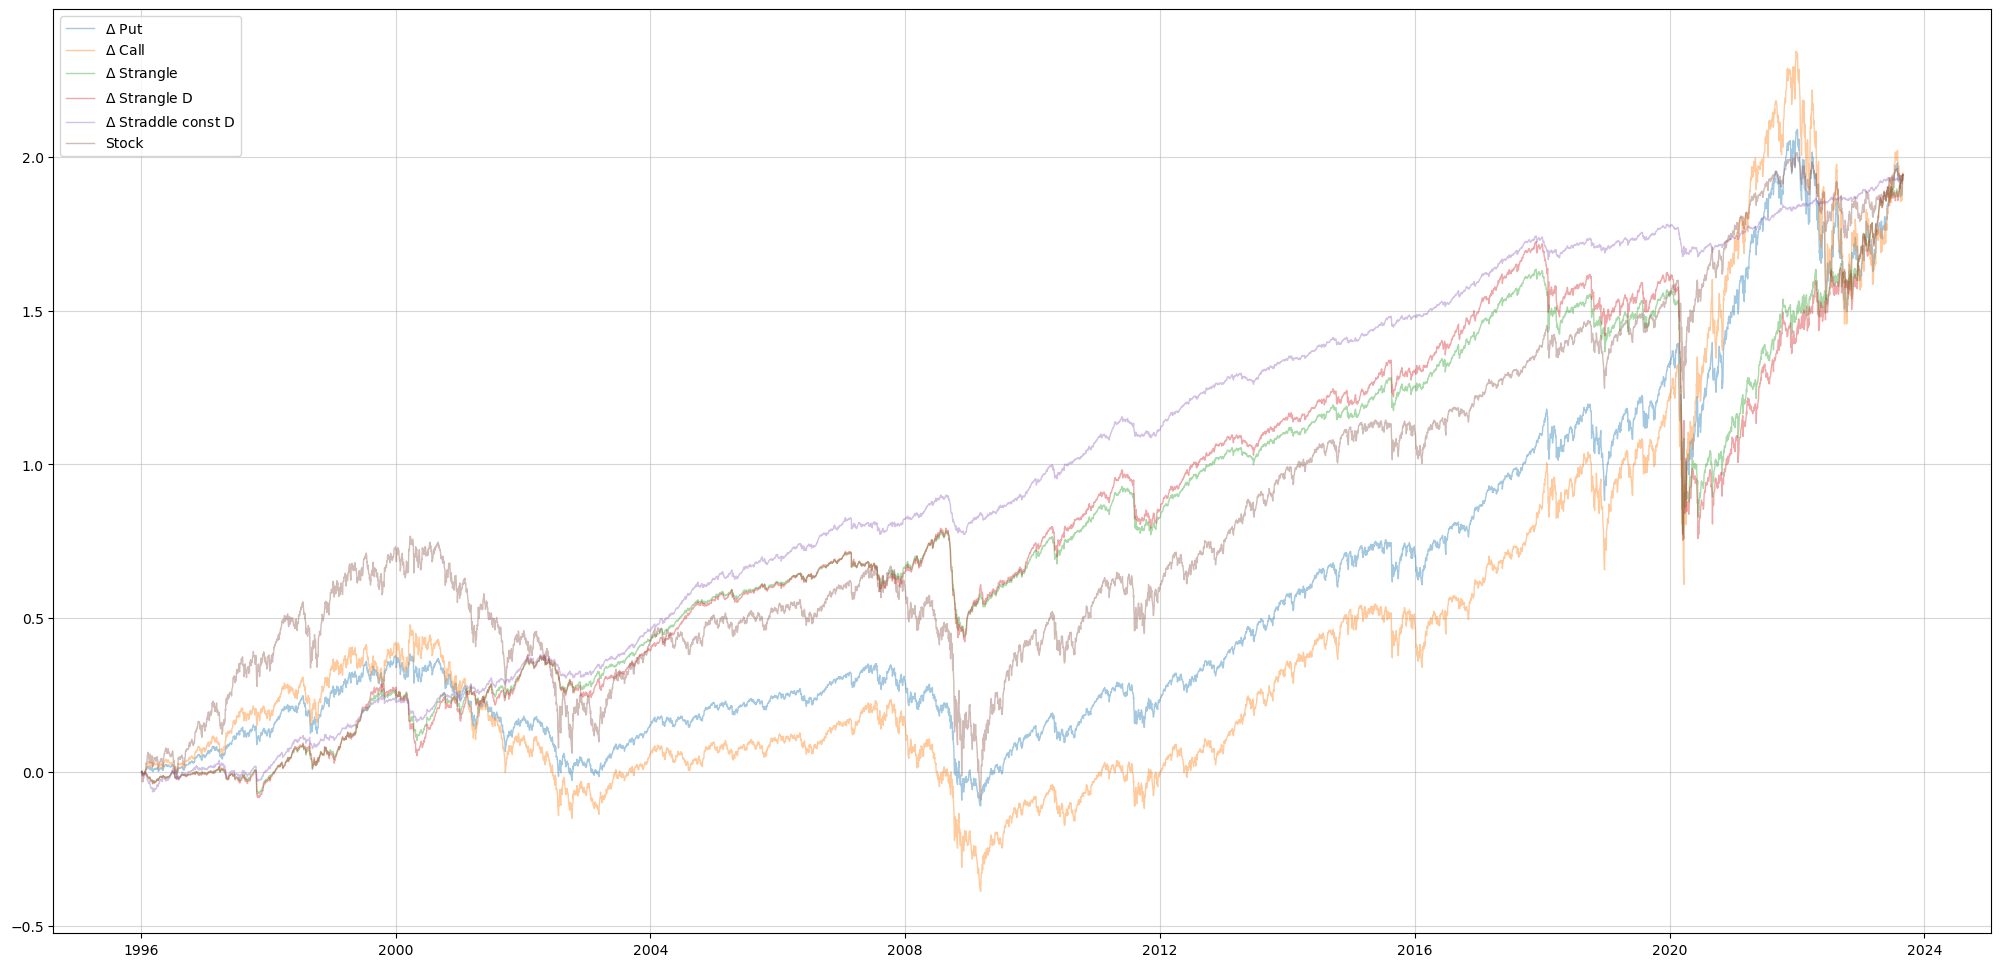

In [96]:
df = df_orpy.copy()

plt.figure(figsize=(25, 12))

lw = 1
names = ["Put", "Call", "Strangle", "Strangle D", "Straddle const D"]
# vars = ["CF_30_const_D_put_ATM", "CF_30_const_D_call_ATM", "CF_30_straddle_", "CF_30_straddle_D_", "CF_30_straddle_const_"] # "CF_30_straddle_const_D_", "30_D_strangle", "30_D_straddle", "30_D_butterfly_spread"
vars = ["CF_30_D_put_ATM", "CF_30_D_call_ATM", "CF_30_straddle_", "CF_30_straddle_D_", "CF_30_straddle_const_"] # "CF_30_straddle_const_D_", "30_D_strangle", "30_D_straddle", "30_D_butterfly_spread"

last_stock_val = np.cumsum(df["CF_ticker_const"]).iloc[-1]

for name, var in zip(names, vars):
    last_option_val = np.cumsum(df[var]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[var]),
         label=rf"$\Delta$ {name}", alpha=0.4, linewidth=lw)

plt.plot(df["date"], np.cumsum(df["CF_ticker_const"]),
    label="Stock", alpha=0.4, linewidth=lw)

# x_SW = df["SW_month"]
# last_val = np.cumsum(x_SW).iloc[-1]
# scalar = last_stock_val/last_val
# plt.plot(df["date"], scalar * np.cumsum(x_SW), label = "Swap 30")

# x_SW_dly = df["SW_month"]
# last_val = np.cumsum(x_SW_dly).iloc[-1]
# plt.plot(df["date"], np.cumsum(x_SW_dly), label = "Monthly Swap", linewidth=lw, alpha=1)
# 
# x_SW_dly = df["SW_day"]
# last_val = np.cumsum(x_SW_dly).iloc[-1]
# plt.plot(df["date"], np.cumsum(x_SW_dly), label = "Daily Swap", linewidth=1.75*lw, alpha=1)


plt.grid(alpha=0.5)
plt.legend()
plt.savefig("figures/delta_acc fig.pdf")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15464\3566249192.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


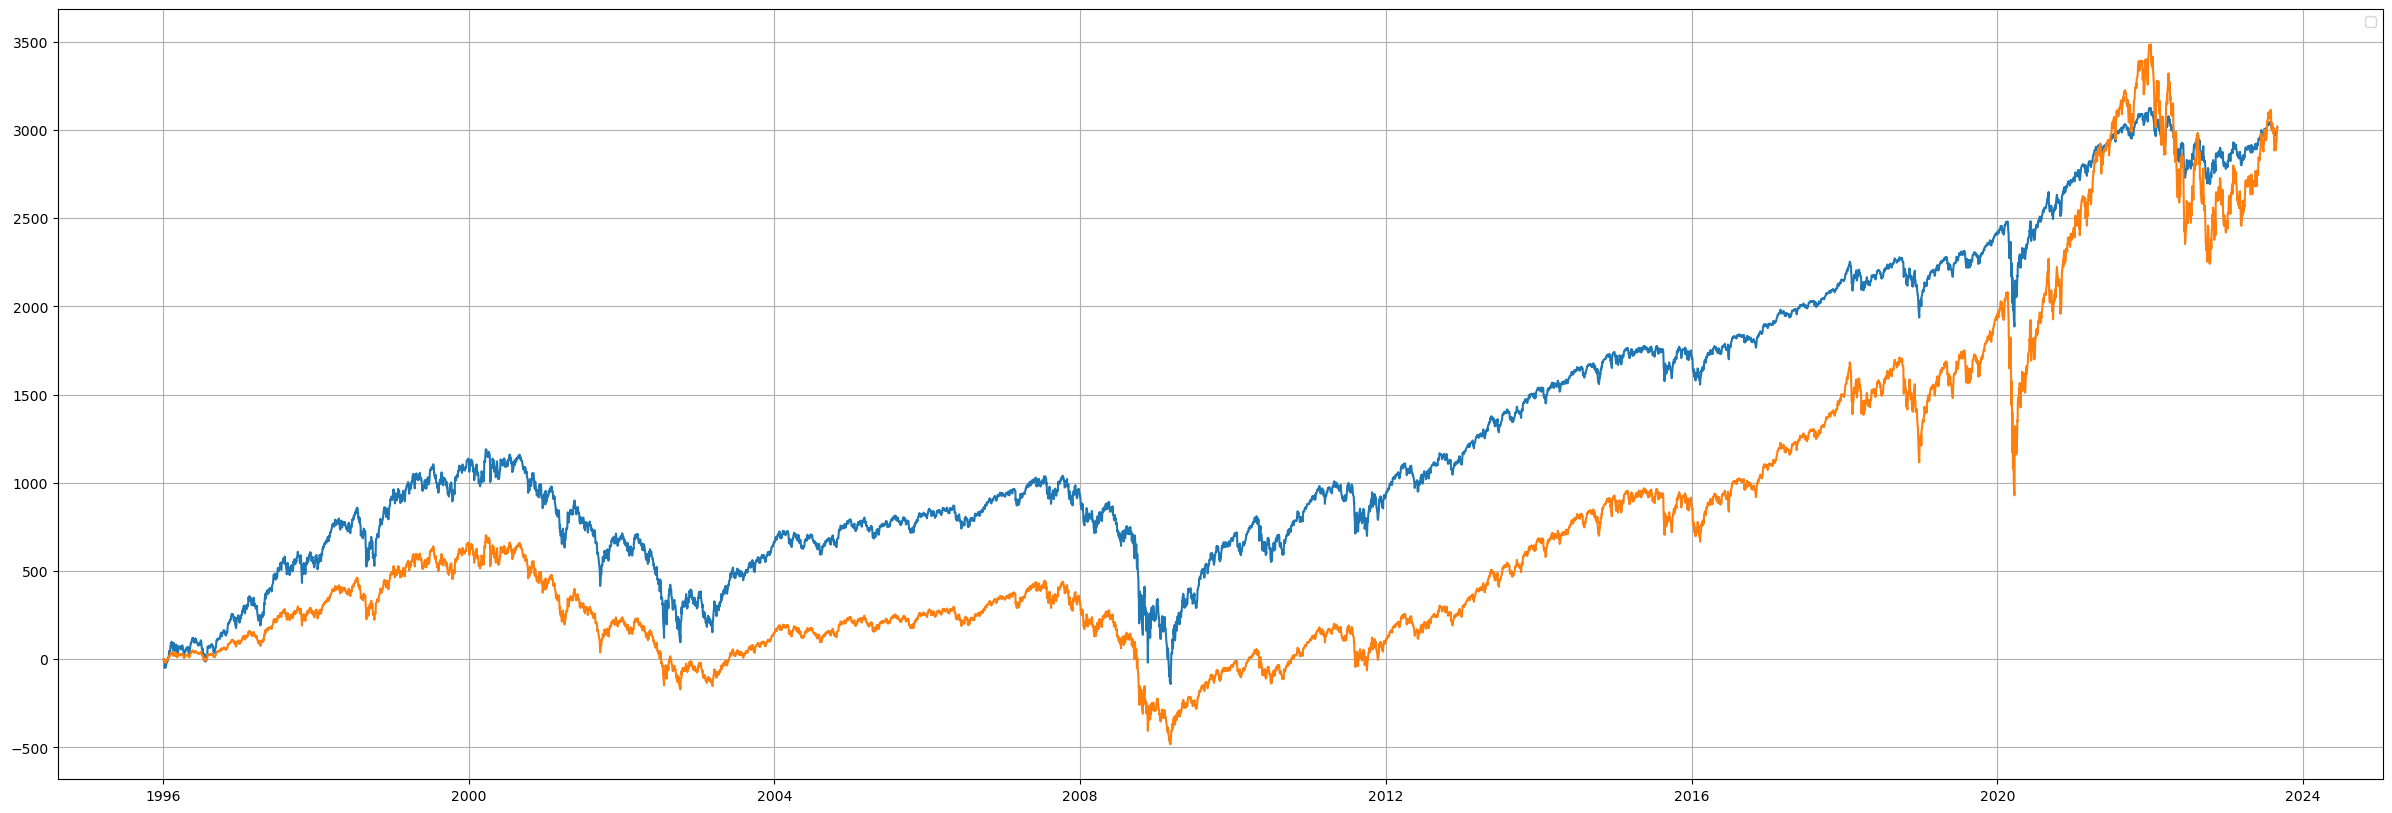

In [36]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["CF_ticker"]).iloc[-1]
    
# for put_call in ["straddle", "D_straddle", "strangle", "D_strangle", "butterfly_spread", "D_butterfly_spread"]:
#     last_option_val = np.cumsum(df[f"30_{put_call}"]).iloc[-1]
#     scalar = last_stock_val/last_option_val
#     plt.plot(df["date"], scalar * np.cumsum(df[f"30_{put_call}"]), label=rf"{put_call} 30", alpha=0.8)

scalar = np.cumsum(df_old["ticker_change_free"]).iloc[-1] / np.cumsum(df["CF_ticker_const"]).iloc[-1]

plt.plot(df["date"], np.cumsum(scalar * df["CF_ticker_const"]))
plt.plot(df["date"], np.cumsum(df_old["ticker_change_free"]))

plt.grid()
plt.legend()
plt.show()

# No hedge

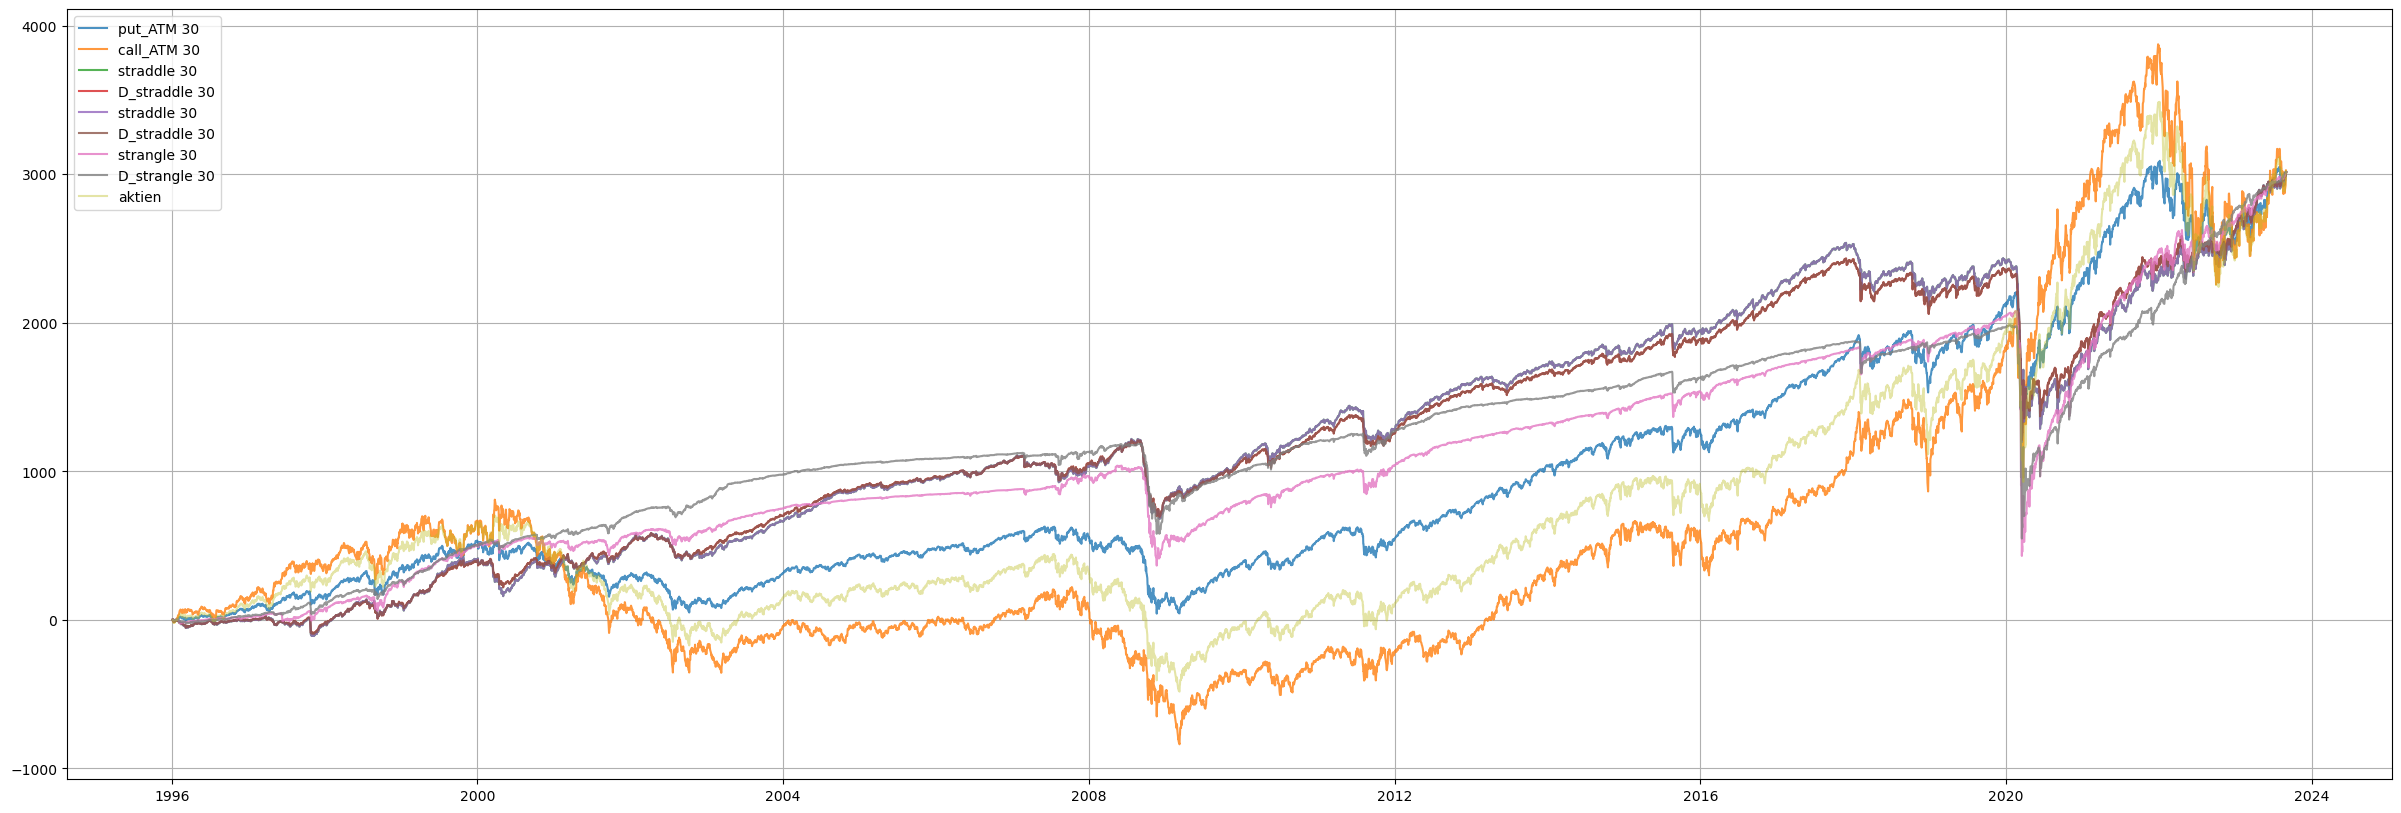

In [51]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["put_ATM", "call_ATM", "straddle", "D_straddle", "straddle", "D_straddle", "strangle", "D_strangle"]:
    last_option_val = np.cumsum(df[f"30_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_{put_call}"]),
         label=rf"{put_call} 30", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="aktien", alpha=0.4)

plt.grid()
plt.legend()
plt.show()

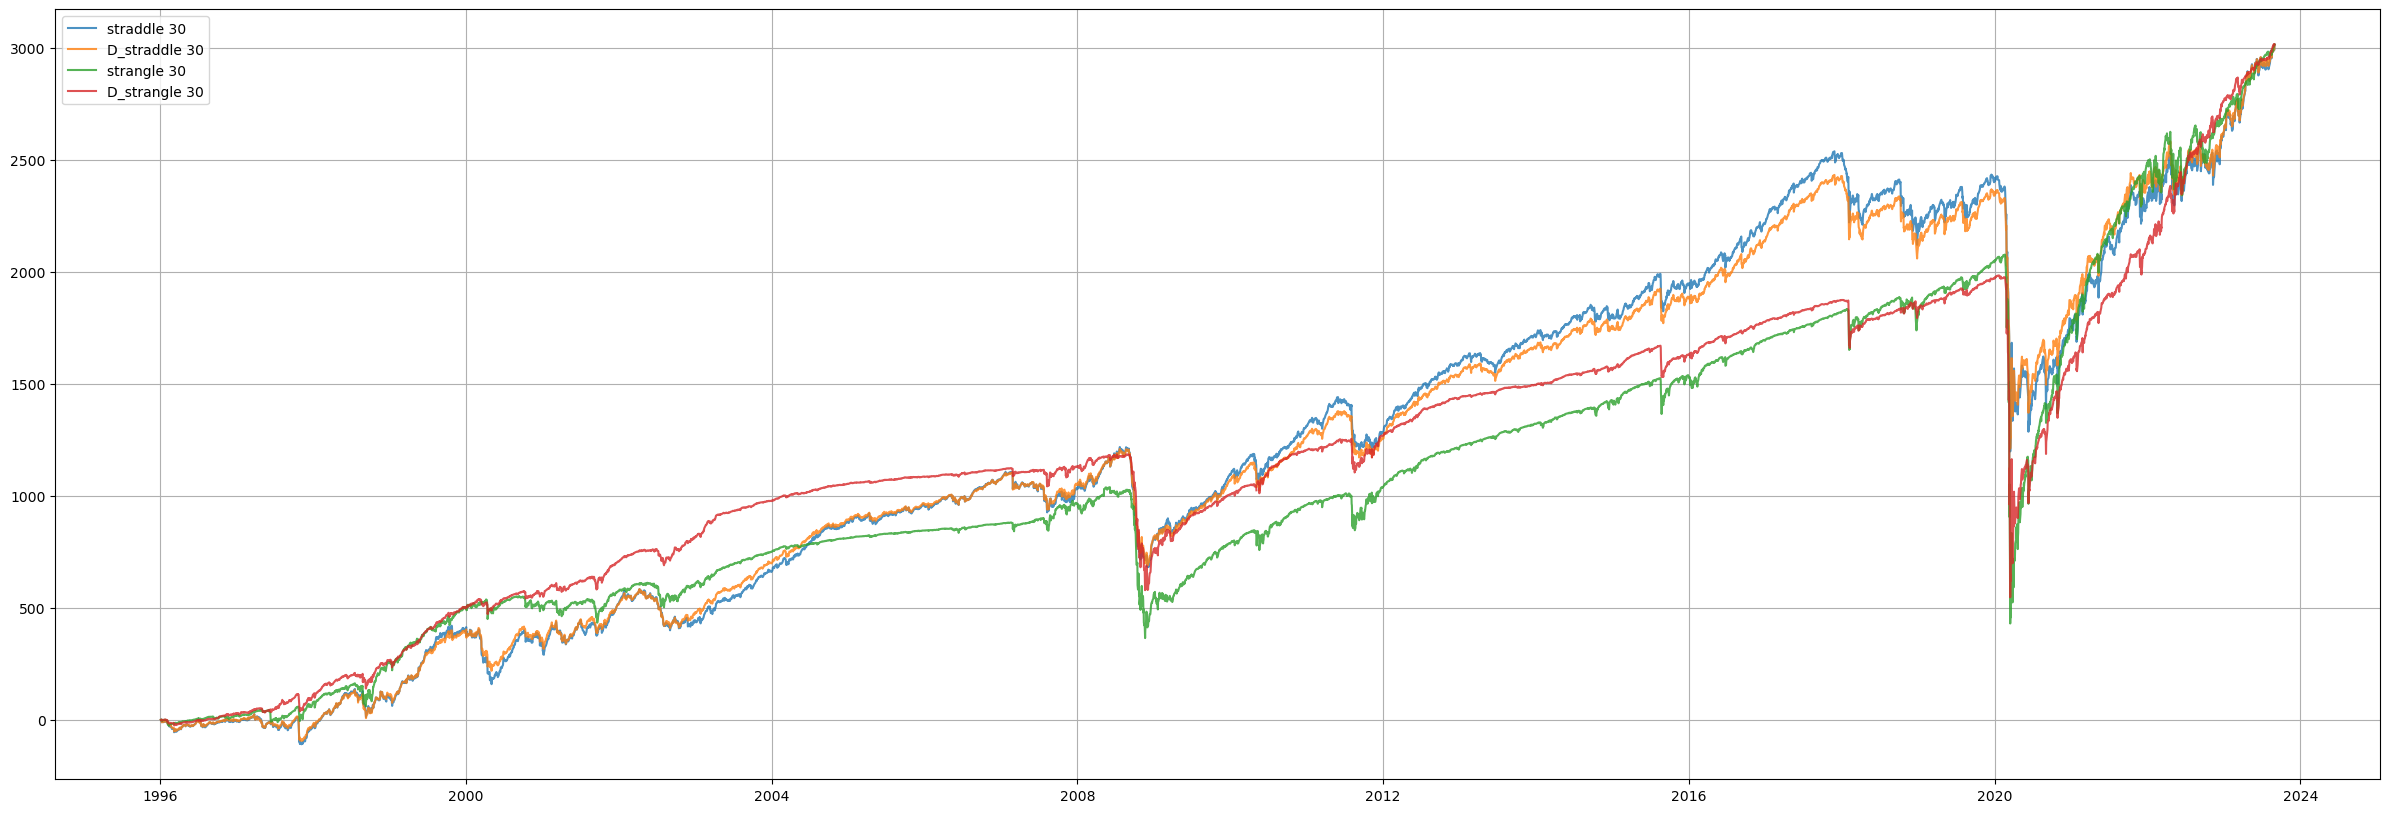

In [52]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["straddle", "D_straddle", "strangle", "D_strangle"]:
    last_option_val = np.cumsum(df[f"30_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_{put_call}"]), label=rf"{put_call} 30", alpha=0.8)


plt.grid()
plt.legend()
plt.show()

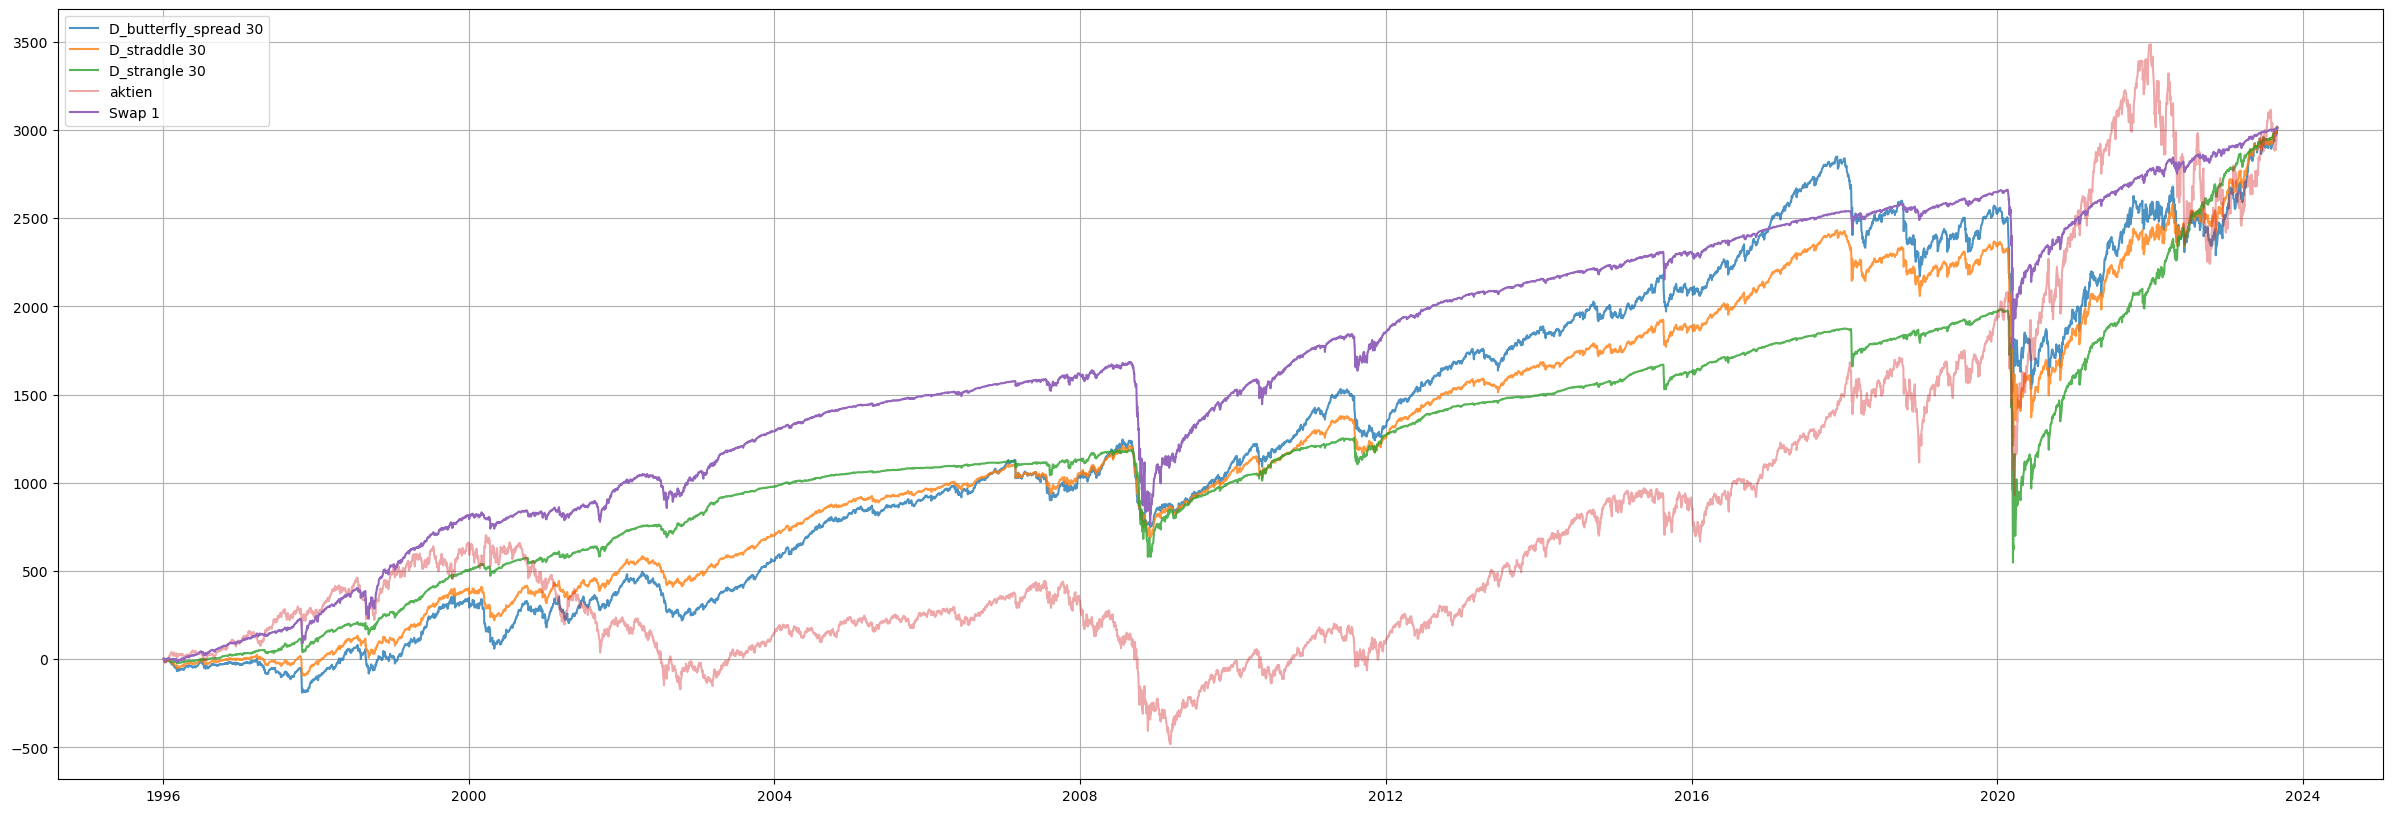

In [102]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["D_butterfly_spread", "D_straddle", "D_strangle"]:
    last_option_val = np.cumsum(df[f"30_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_{put_call}"]), label=rf"{put_call} 30", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="aktien", alpha=0.4)

x_SW_dly = df["SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap 1")


plt.grid()
plt.legend()
plt.show()

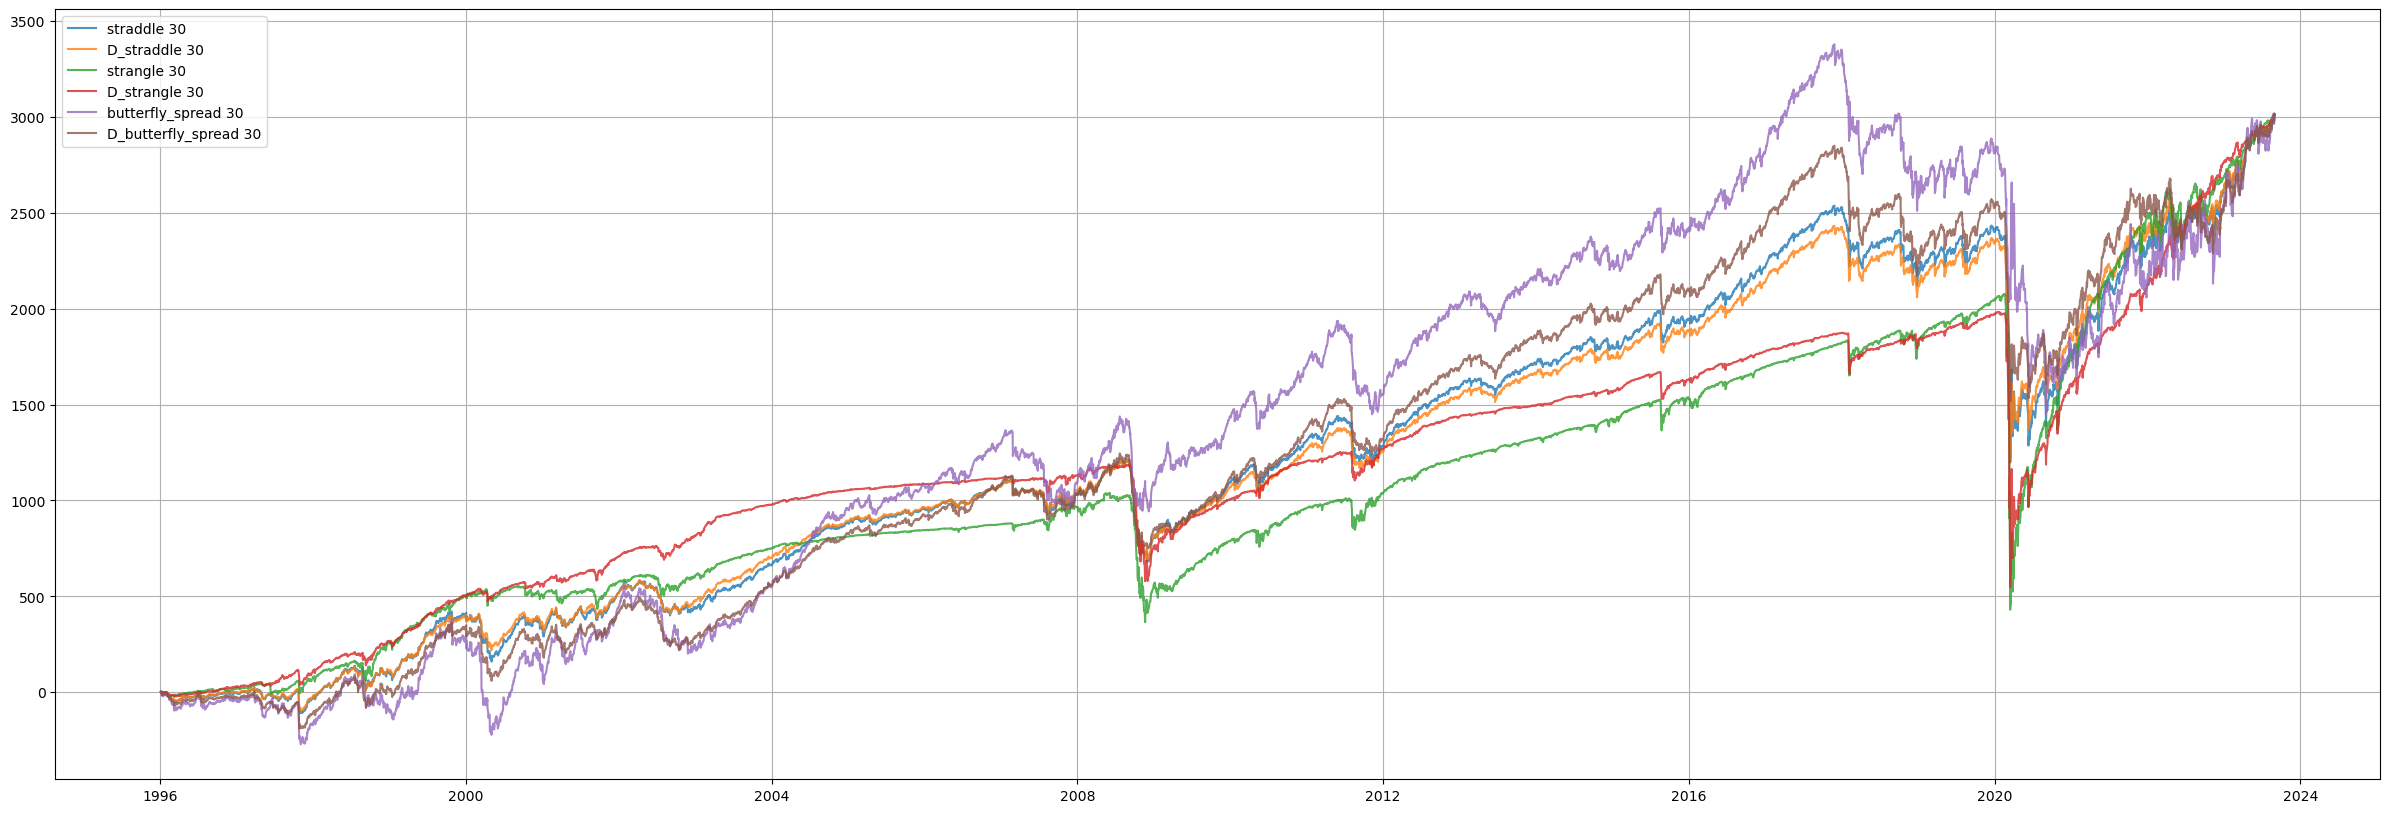

In [103]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["straddle", "D_straddle", "strangle", "D_strangle", "butterfly_spread", "D_butterfly_spread"]:
    last_option_val = np.cumsum(df[f"30_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_{put_call}"]), label=rf"{put_call} 30", alpha=0.8)

plt.grid()
plt.legend()
plt.show()

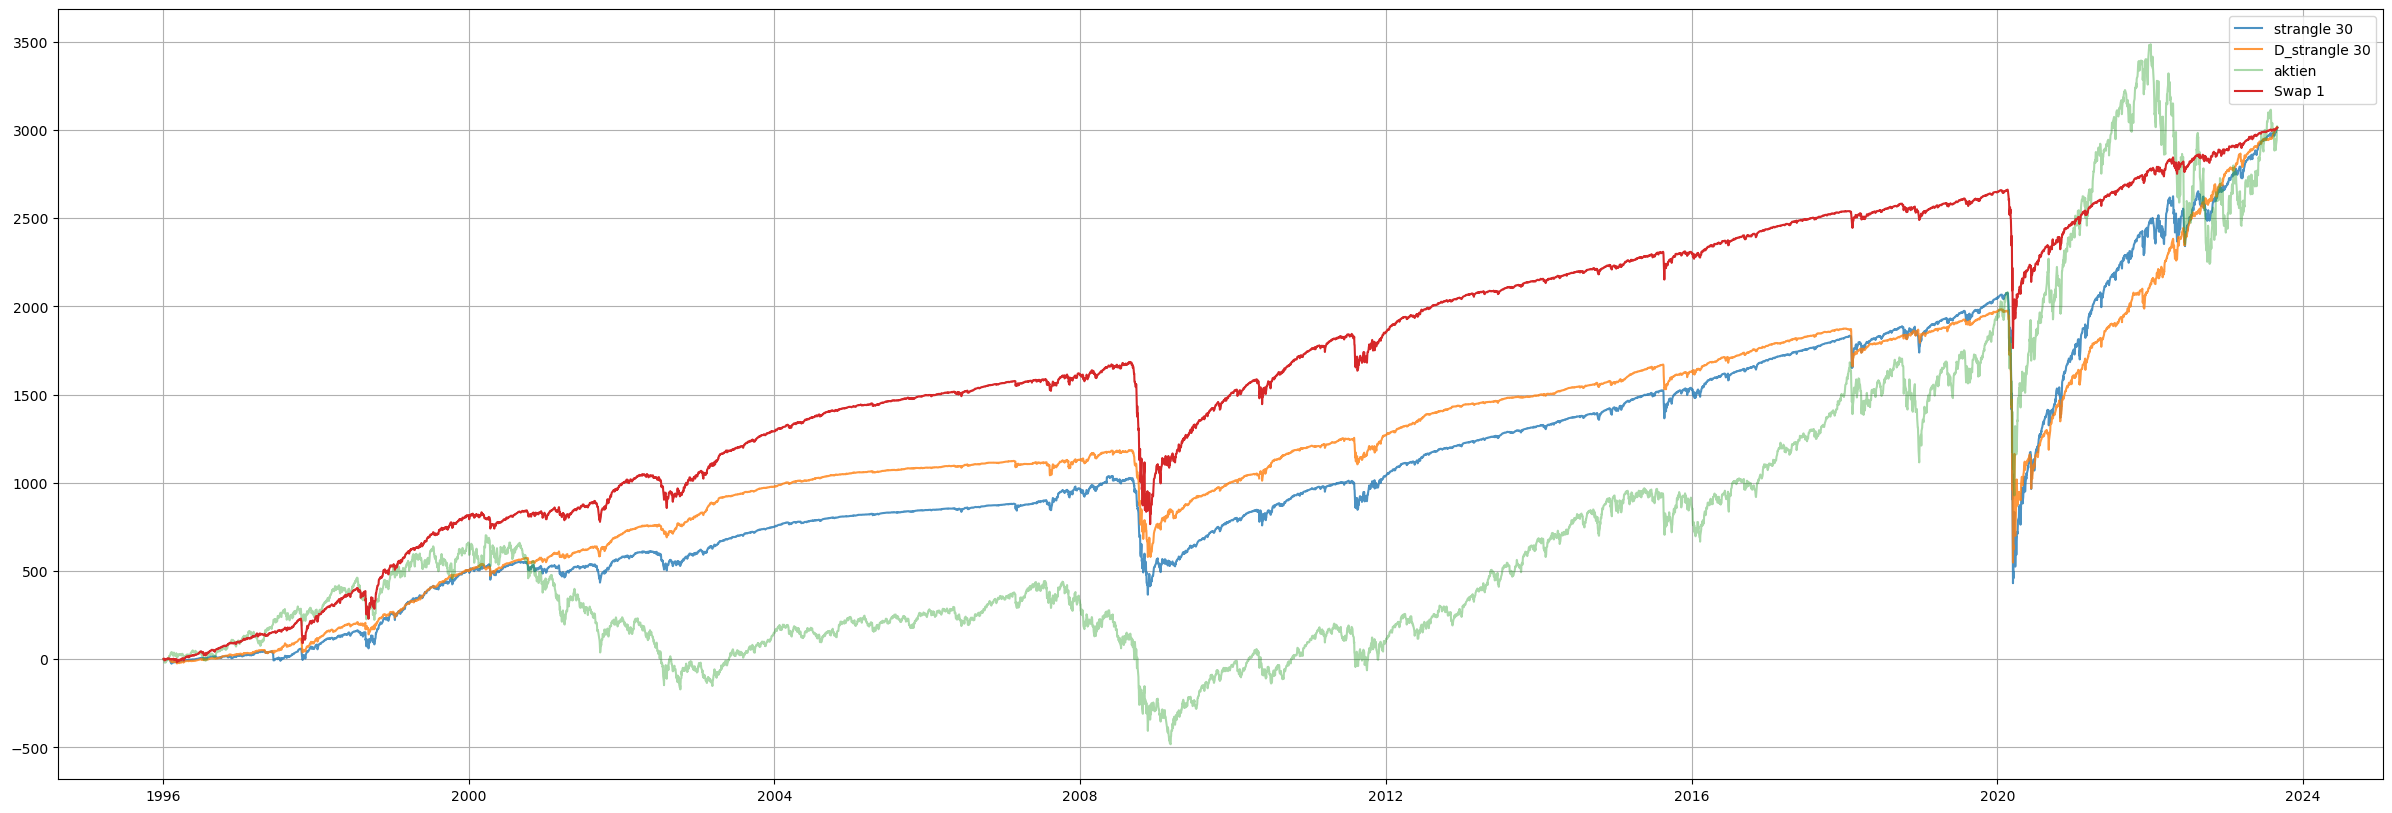

In [53]:
zplt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["strangle", "D_strangle"]:
    last_option_val = np.cumsum(df[f"30_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_{put_call}"]), label=rf"{put_call} 30", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="aktien", alpha=0.4)


x_SW_dly = df["SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap 1")

plt.grid()
plt.legend()
plt.show()

# Plot accumulated cashflow

# Current front page for LaTeX

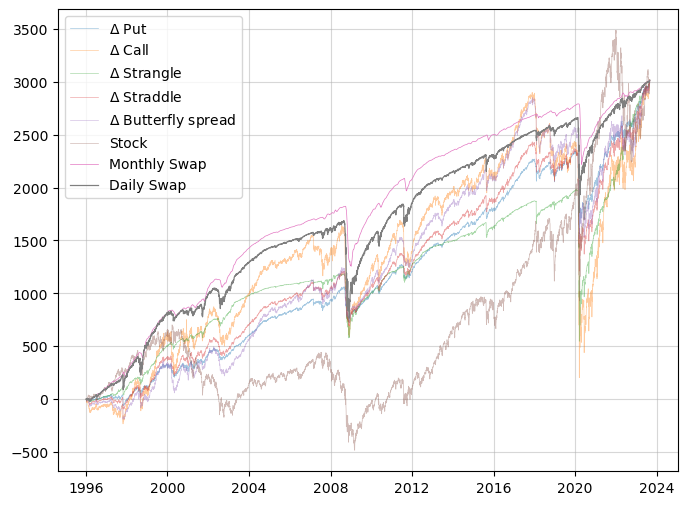

In [85]:
plt.figure(figsize=(8, 6))

lw = 0.5
last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
names = ["Put", "Call", "Strangle", "Straddle", "Butterfly spread"]
vars = ["30_put_D_ATM", "30_call_D_ATM", "30_D_strangle", "30_D_straddle", "30_D_butterfly_spread"]
    
for name, var in zip(names, vars):
    last_option_val = np.cumsum(df[var]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[var]),
         label=rf"$\Delta$ {name}", alpha=0.4, linewidth=lw)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="Stock", alpha=0.4, linewidth=lw)

# x_SW = df["SW_month"]
# last_val = np.cumsum(x_SW).iloc[-1]
# scalar = last_stock_val/last_val
# plt.plot(df["date"], scalar * np.cumsum(x_SW), label = "Swap 30")

x_SW_dly = df["SW_month"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Monthly Swap", linewidth=lw, alpha=1)

x_SW_dly = df["SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Daily Swap", linewidth=1.75*lw, alpha=1)


plt.grid(alpha=0.5)
plt.legend()
plt.savefig("figures/delta_acc fig.pdf")
plt.show()

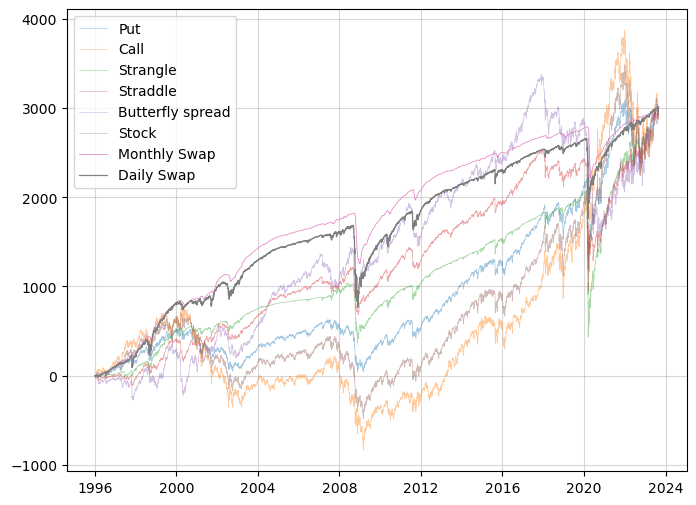

In [86]:
plt.figure(figsize=(8, 6))

lw = 0.5
last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
names = ["Put", "Call", "Strangle", "Straddle", "Butterfly spread"]
vars = ["30_put_ATM", "30_call_ATM", "30_strangle", "30_straddle", "30_butterfly_spread"]
    
for name, var in zip(names, vars):
    last_option_val = np.cumsum(df[var]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[var]),
         label=name, alpha=0.4, linewidth=lw)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="Stock", alpha=0.4, linewidth=lw)

# x_SW = df["SW_month"]
# last_val = np.cumsum(x_SW).iloc[-1]
# scalar = last_stock_val/last_val
# plt.plot(df["date"], scalar * np.cumsum(x_SW), label = "Swap 30")

x_SW_dly = df["SW_month"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Monthly Swap", linewidth=lw, alpha=1)

x_SW_dly = df["SW_day"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Daily Swap", linewidth=1.75*lw, alpha=1)

plt.grid(alpha=0.5)
plt.legend()
plt.savefig("figures/acc fig.pdf")
plt.show()

# Other

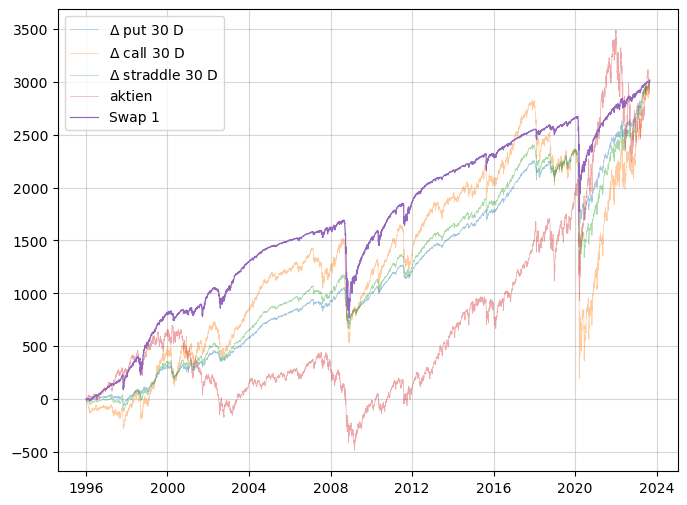

In [43]:
plt.figure(figsize=(8, 6))

lw = 0.5
last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["put", "call", "straddle"]:
    last_option_val = np.cumsum(df[f"30_D_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_D_{put_call}"]),
         label=rf"$\Delta$ {put_call} 30 D", alpha=0.4, linewidth=lw)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="aktien", alpha=0.4, linewidth=lw)

# x_SW = df["SW_month"]
# last_val = np.cumsum(x_SW).iloc[-1]
# scalar = last_stock_val/last_val
# plt.plot(df["date"], scalar * np.cumsum(x_SW), label = "Swap 30")

df["SW_day_new"] = df["SW_day"]
x_SW_dly = df["SW_day_new"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap 1", linewidth=1.75*lw, alpha=1)

plt.grid(alpha=0.5)
plt.legend()
plt.savefig("figures/acc fig.pdf")
plt.show()

# Random Stuff from here

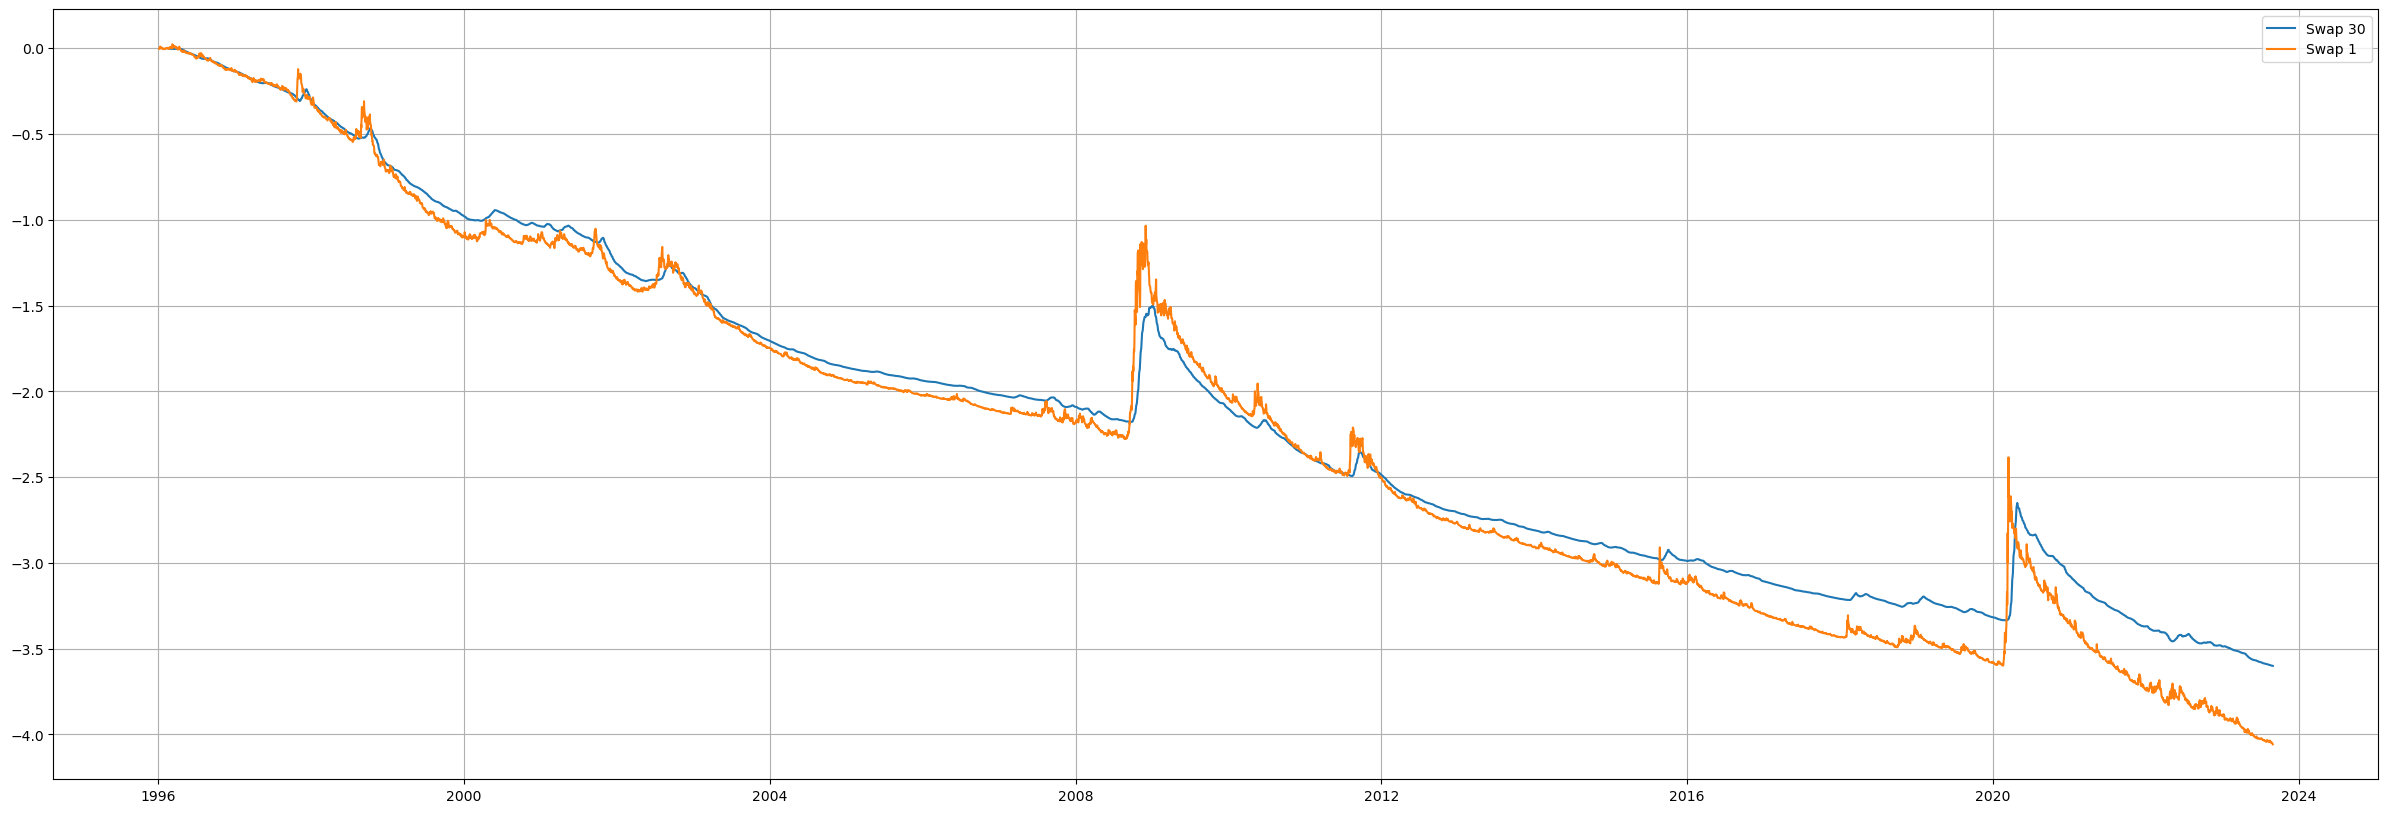

In [44]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
# for put_call in ["put", "call", "straddle"]:
#     plt.plot(df["date"], np.cumsum(df[f"30_D_{put_call}"]),
#          label=rf"$\Delta$ {put_call} 30 D", alpha=0.8)

# plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
#     label="aktien", alpha=0.4)

x_SW = df["SW_month"]
plt.plot(df["date"], np.cumsum(x_SW/21), label = "Swap 30")

df["SW_day_new"] = df["SW_day"]
x_SW_dly = df["SW_day_new"]
plt.plot(df["date"], np.cumsum(x_SW_dly), label = "Swap 1")

plt.grid()
plt.legend()
plt.show()

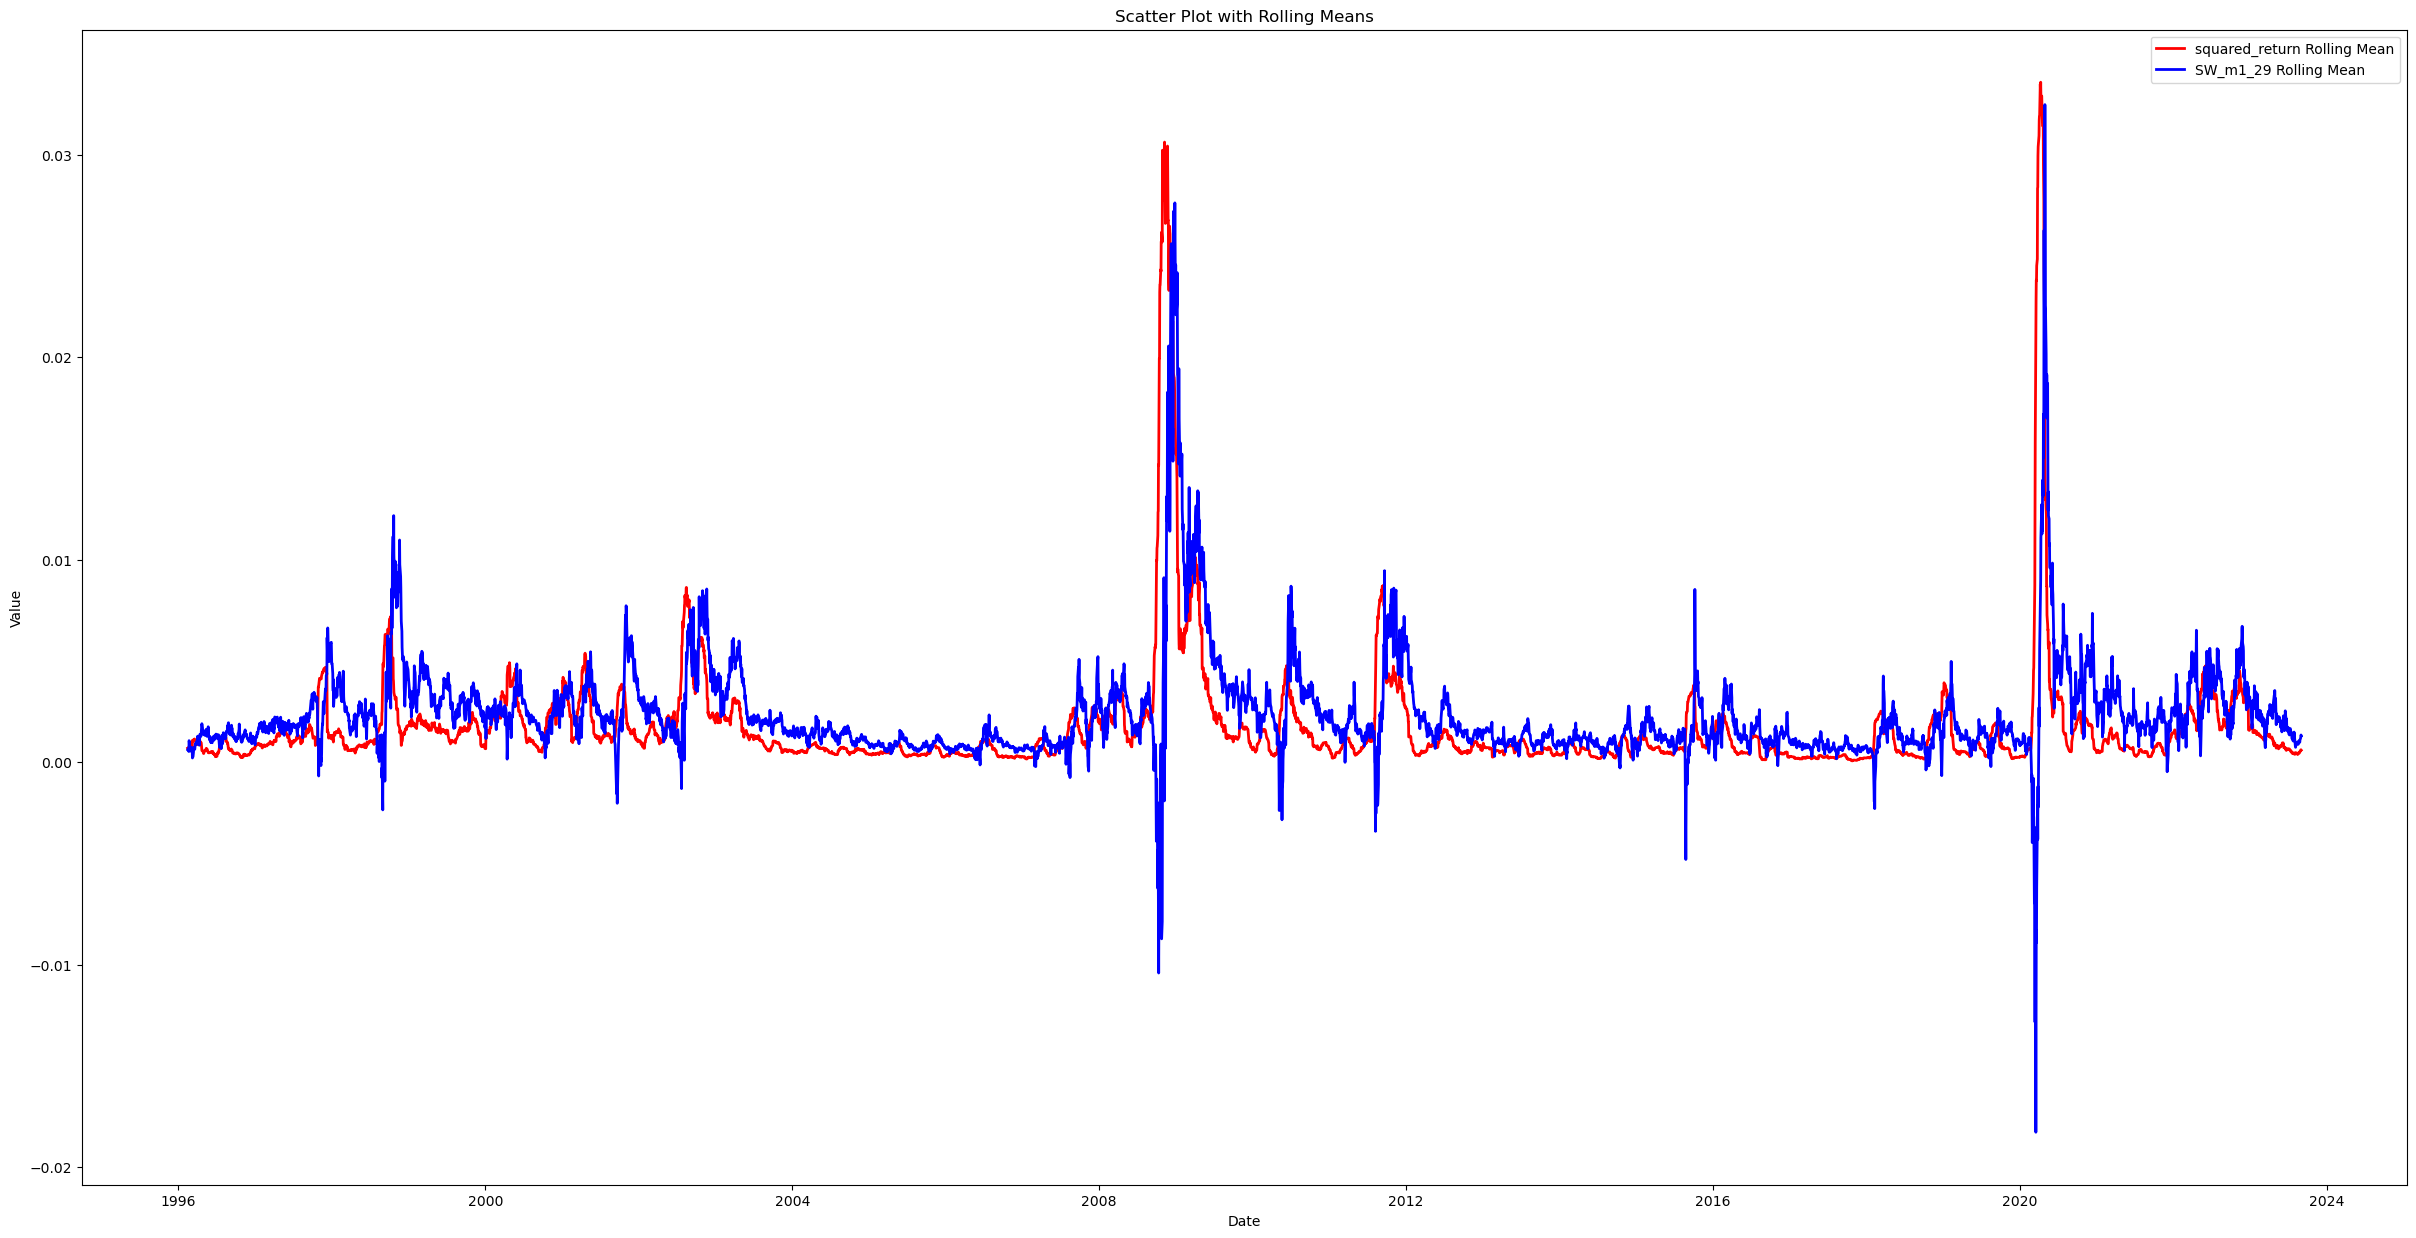

In [45]:
yr = df["date"].dt.year
df = df#[yr == 2020]

# Define the rolling window size (e.g., 20 days)
window_size = 30

# Compute the rolling mean for each series
df["squared_return_rolling"] = (252/21 * df["squared_return"]).rolling(window=window_size).mean()
df["SW_m1_rolling"] = (df["SW_m1_29"]-df["SW_0_29"]*20/21).rolling(window=window_size).mean()

# Create the plot
plt.figure(figsize=(30,15))

# # Scatter plots of the raw data
# plt.scatter(df["date"], 252 * df["squared_return"], label="squared_return", alpha=0.3)
# plt.scatter(df["date"], df["SW_m1_29"], label="SW_0_29", alpha=0.3)

# Line plots for the rolling means
plt.plot(df["date"], df["squared_return_rolling"], label="squared_return Rolling Mean", color="red", linewidth=2)
plt.plot(df["date"], df["SW_m1_rolling"], label="SW_m1_29 Rolling Mean", color="blue", linewidth=2)

# Adding labels and legend
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Scatter Plot with Rolling Means")
plt.legend()
plt.show()

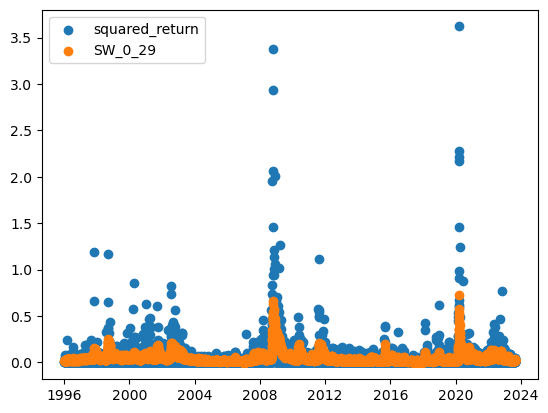

In [46]:
yr = df["date"].dt.year
df = df#[yr == 2020]
plt.scatter(df["date"], (252 * df["squared_return"]), label = "squared_return")
plt.scatter(df["date"], (df["SW_m1_29"]), label = "SW_0_29")
plt.legend()

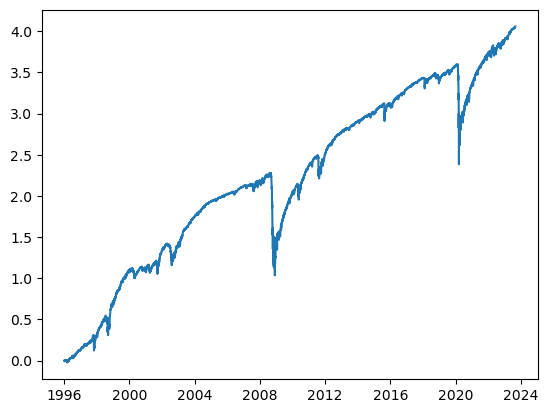

In [47]:
plt.plot(df["date"], np.cumsum(df["SW_m1_29"]-20/21*df["SW_0_29"]-252/21*df["squared_return"]), label = "SW_m1_29 - SW_0_29")

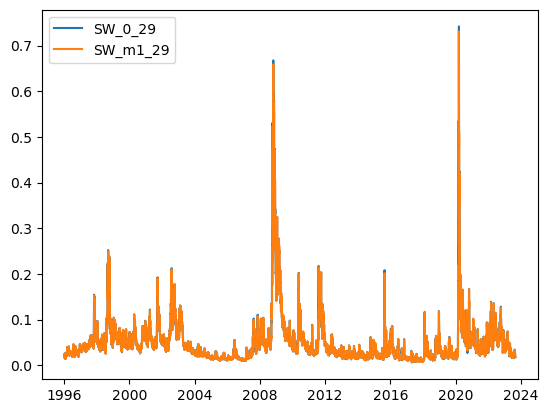

In [48]:
# plt.plot(df["date"], 252*df["squared_return"], label = "squared_return")
plt.plot(df["date"], df["SW_0_29"], label = "SW_0_29")
plt.plot(df["date"], df["SW_m1_29"], label = "SW_m1_29")
plt.legend()
plt.show()

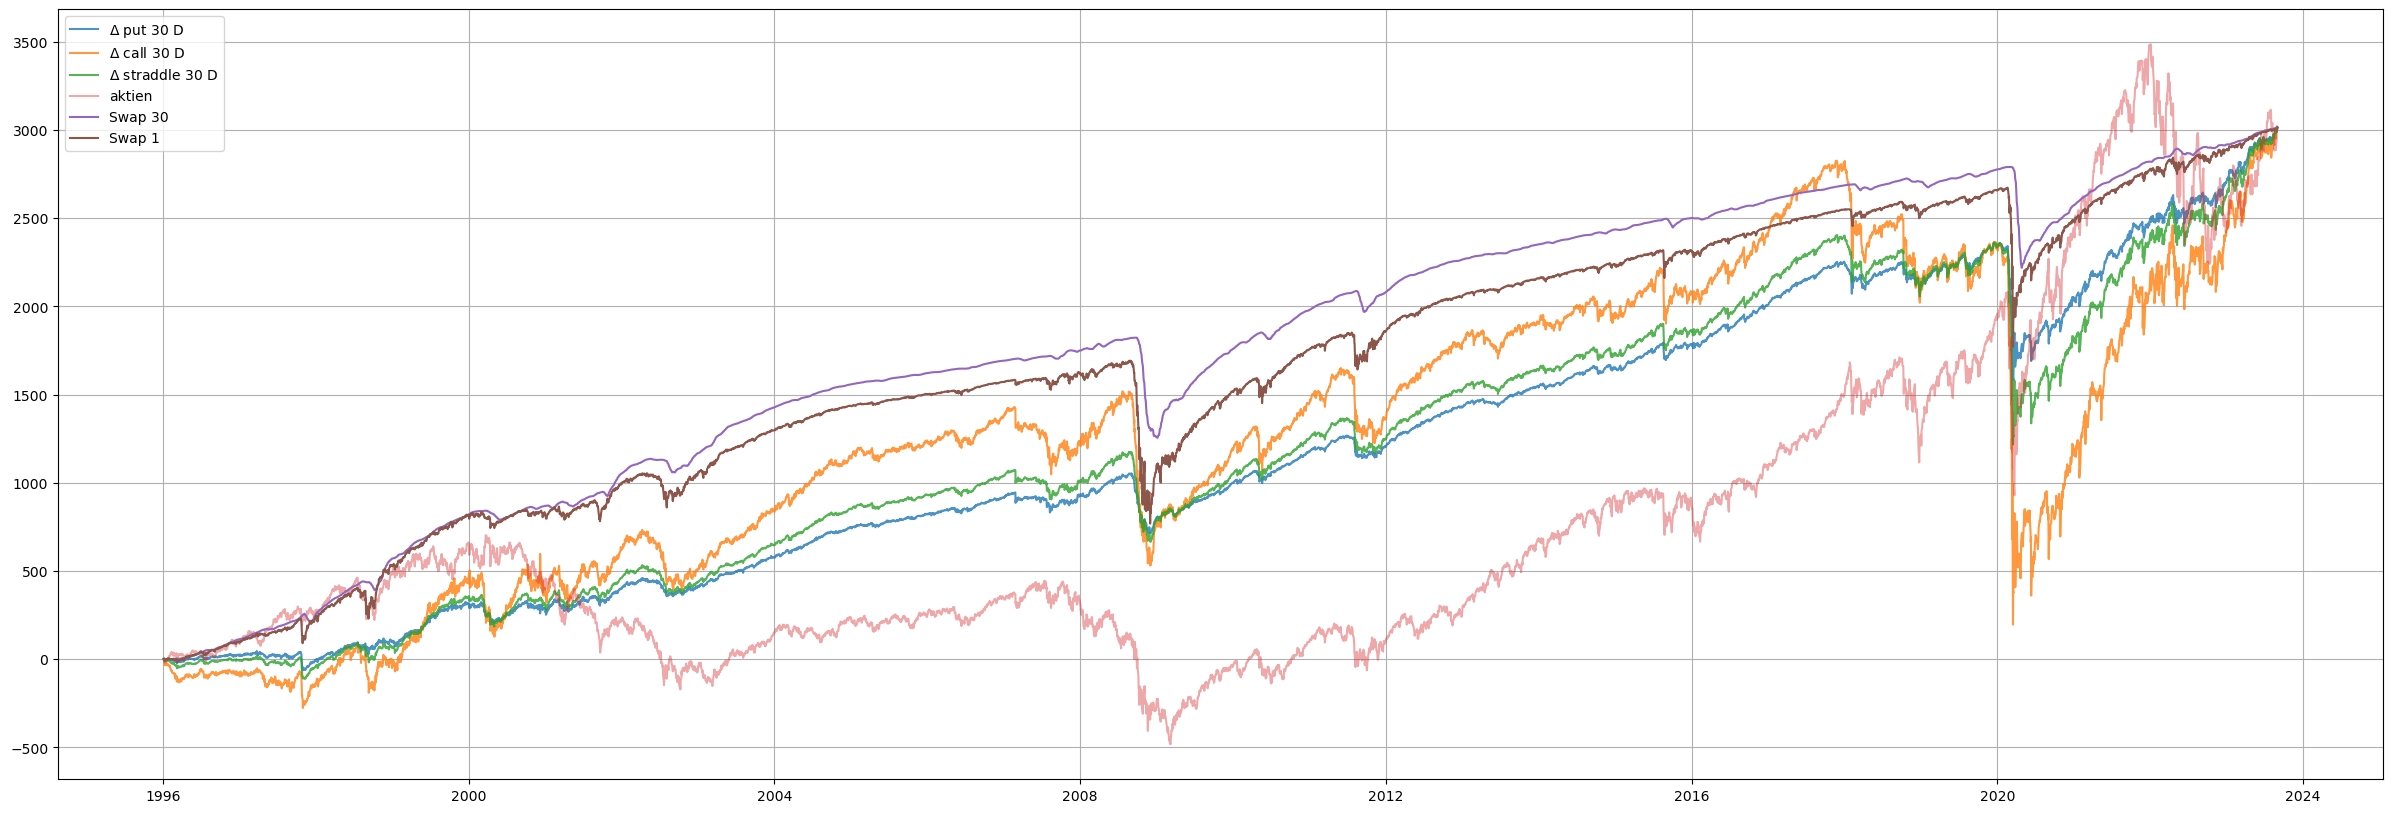

In [49]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]
    
for put_call in ["put", "call", "straddle"]:
    last_option_val = np.cumsum(df[f"30_D_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"30_D_{put_call}"]),
         label=rf"$\Delta$ {put_call} 30 D", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="aktien", alpha=0.4)

x_SW = df["SW_month"]
last_val = np.cumsum(x_SW).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW), label = "Swap 30")

df["SW_day_new"] = df["SW_day"]
x_SW_dly = df["SW_day_new"]
last_val = np.cumsum(x_SW_dly).iloc[-1]
scalar = last_stock_val/last_val
plt.plot(df["date"], scalar * np.cumsum(x_SW_dly), label = "Swap 1")

plt.grid()
plt.legend()
plt.show()

# Other figures

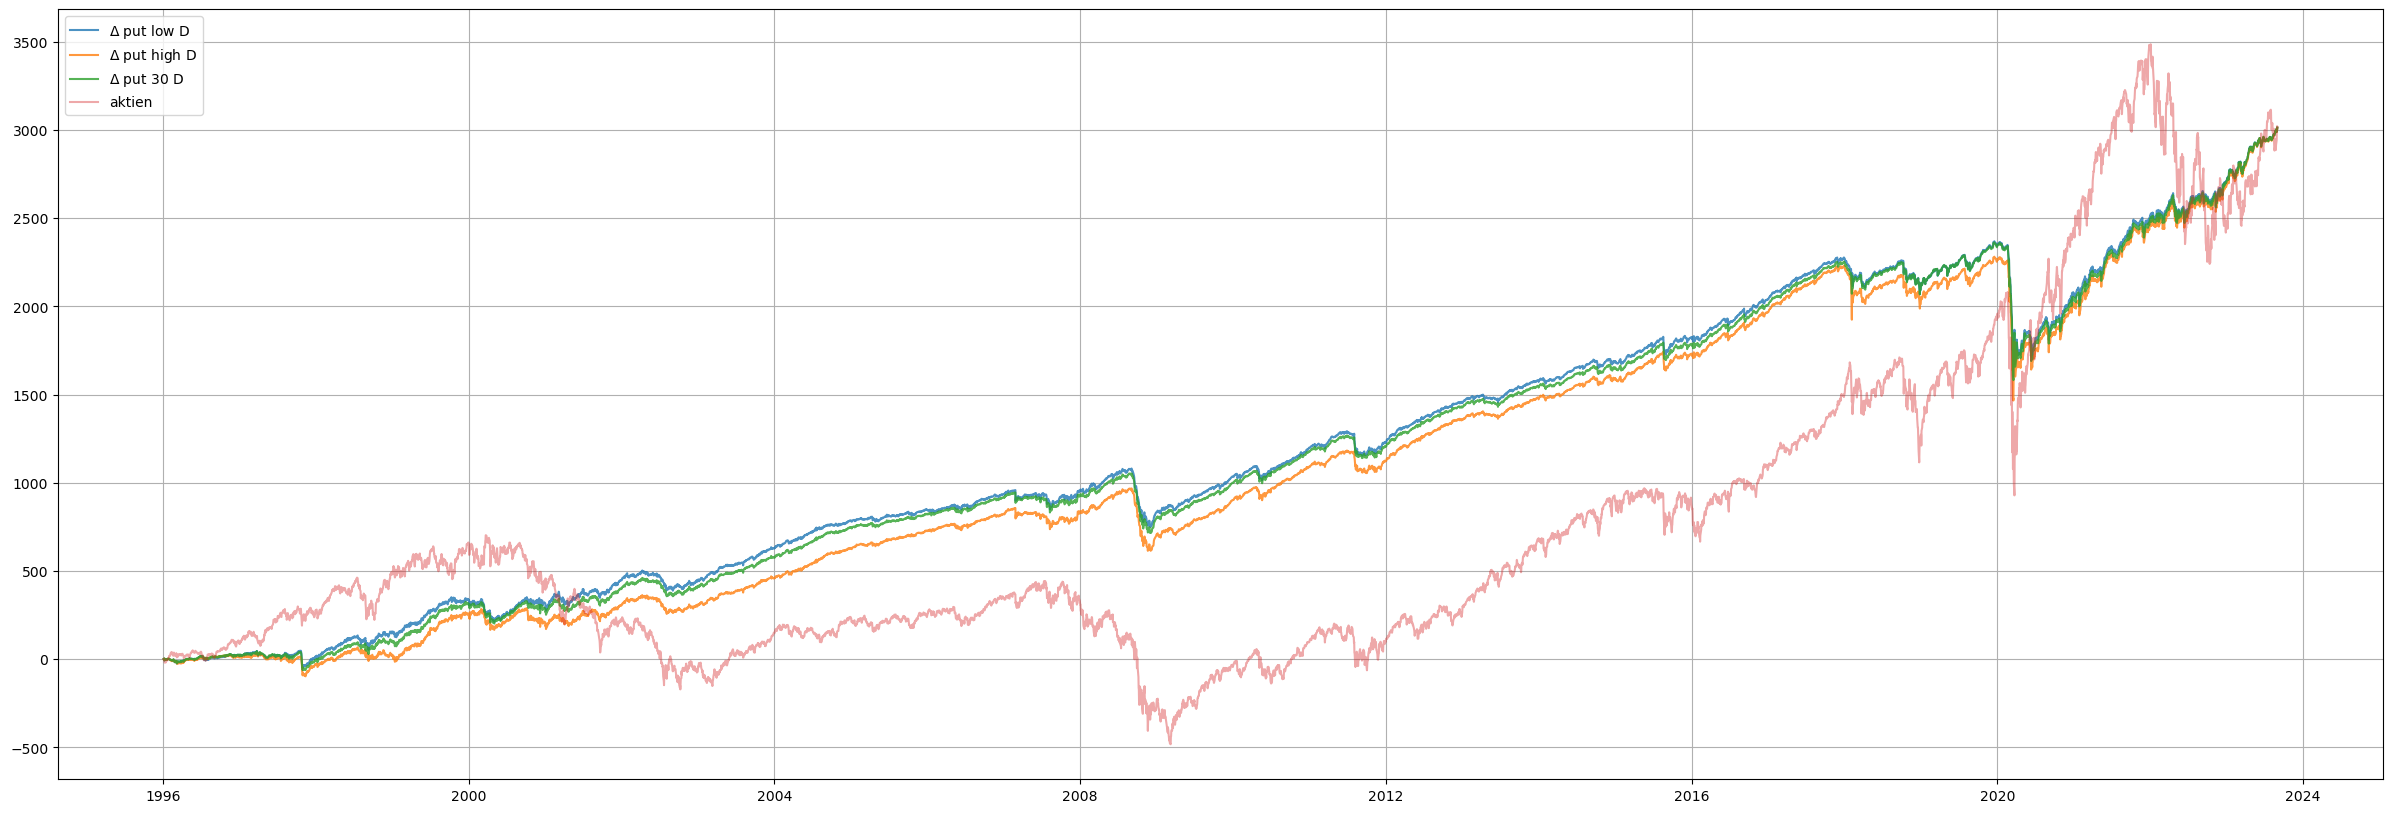

In [50]:
plt.figure(figsize=(30, 10))

last_stock_val = np.cumsum(df["ticker_change_free"]).iloc[-1]

put_call = "put"

for low_high in ["low", "high"]:
    last_option_val = np.cumsum(df[f"free_D_{low_high}_{put_call}"]).iloc[-1]
    scalar = last_stock_val/last_option_val
    plt.plot(df["date"], scalar * np.cumsum(df[f"free_D_{low_high}_{put_call}"]),
         label=rf"$\Delta$ {put_call} " + low_high + " D", alpha=0.8)
    
last_option_val = np.cumsum(df[f"30_D_{put_call}"]).iloc[-1]
scalar = last_stock_val/last_option_val

plt.plot(df["date"], scalar * np.cumsum(df[f"30_D_{put_call}"]),
     label=rf"$\Delta$ {put_call} 30 D", alpha=0.8)

plt.plot(df["date"], np.cumsum(df["ticker_change_free"]),
    label="aktien", alpha=0.4)

plt.grid()
plt.legend()
plt.show()